<a href="https://colab.research.google.com/github/Ajay2597/6220/blob/main/INSE_6220_KidneyStone_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install pycaret==3.0.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 481.8/481.8 kB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.4/46.4 kB 5.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 65.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.9/16.9 MB 59.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.2/81.2 kB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.0/150.0 kB 19.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.8/105.8 kB 13.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 5.8 MB/s eta 0:00:00
  

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
import pandas as pd
plt.rcParams['figure.figsize'] = (7,5)

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [5]:
print("Pandas version: ", pd.__version__)
print("Seaborn version: ", sns.__version__)

Pandas version:  1.5.3
Seaborn version:  0.12.2


In [7]:
df = pd.read_csv('https://raw.githubusercontent.com/Ajay2597/6220/main/Kidney_Stone_Dataset.csv')
df.head(25)

,gravity,ph,osmo,cond,urea,calc,target
0,1.021,4.91,725,14.0,443,2.45,0
1,1.017,5.74,577,20.0,296,4.49,0
2,1.008,7.20,321,14.9,101,2.36,0
3,1.011,5.51,408,12.6,224,2.15,0
4,1.005,6.52,187,7.5,91,1.16,0
5,1.020,5.27,668,25.3,252,3.34,0
6,1.012,5.62,461,17.4,195,1.40,0
7,1.029,5.67,1107,35.9,550,8.48,0
8,1.015,5.41,543,21.9,170,1.16,0
9,1.021,6.13,779,25.7,382,2.21,0


In [8]:
len(df.index)

90

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   gravity  90 non-null     float64
 1   ph       90 non-null     float64
 2   osmo     90 non-null     int64  
 3   cond     90 non-null     float64
 4   urea     90 non-null     int64  
 5   calc     90 non-null     float64
 6   target   90 non-null     int64  
dtypes: float64(4), int64(3)
memory usage: 5.0 KB


In [10]:
print("Number of duplicated rows is: ", df.duplicated().sum())

Number of duplicated rows is:  0


In [11]:
print("Number of rows with NaNs is: ", df.isna().any(axis=1).sum())

Number of rows with NaNs is:  0


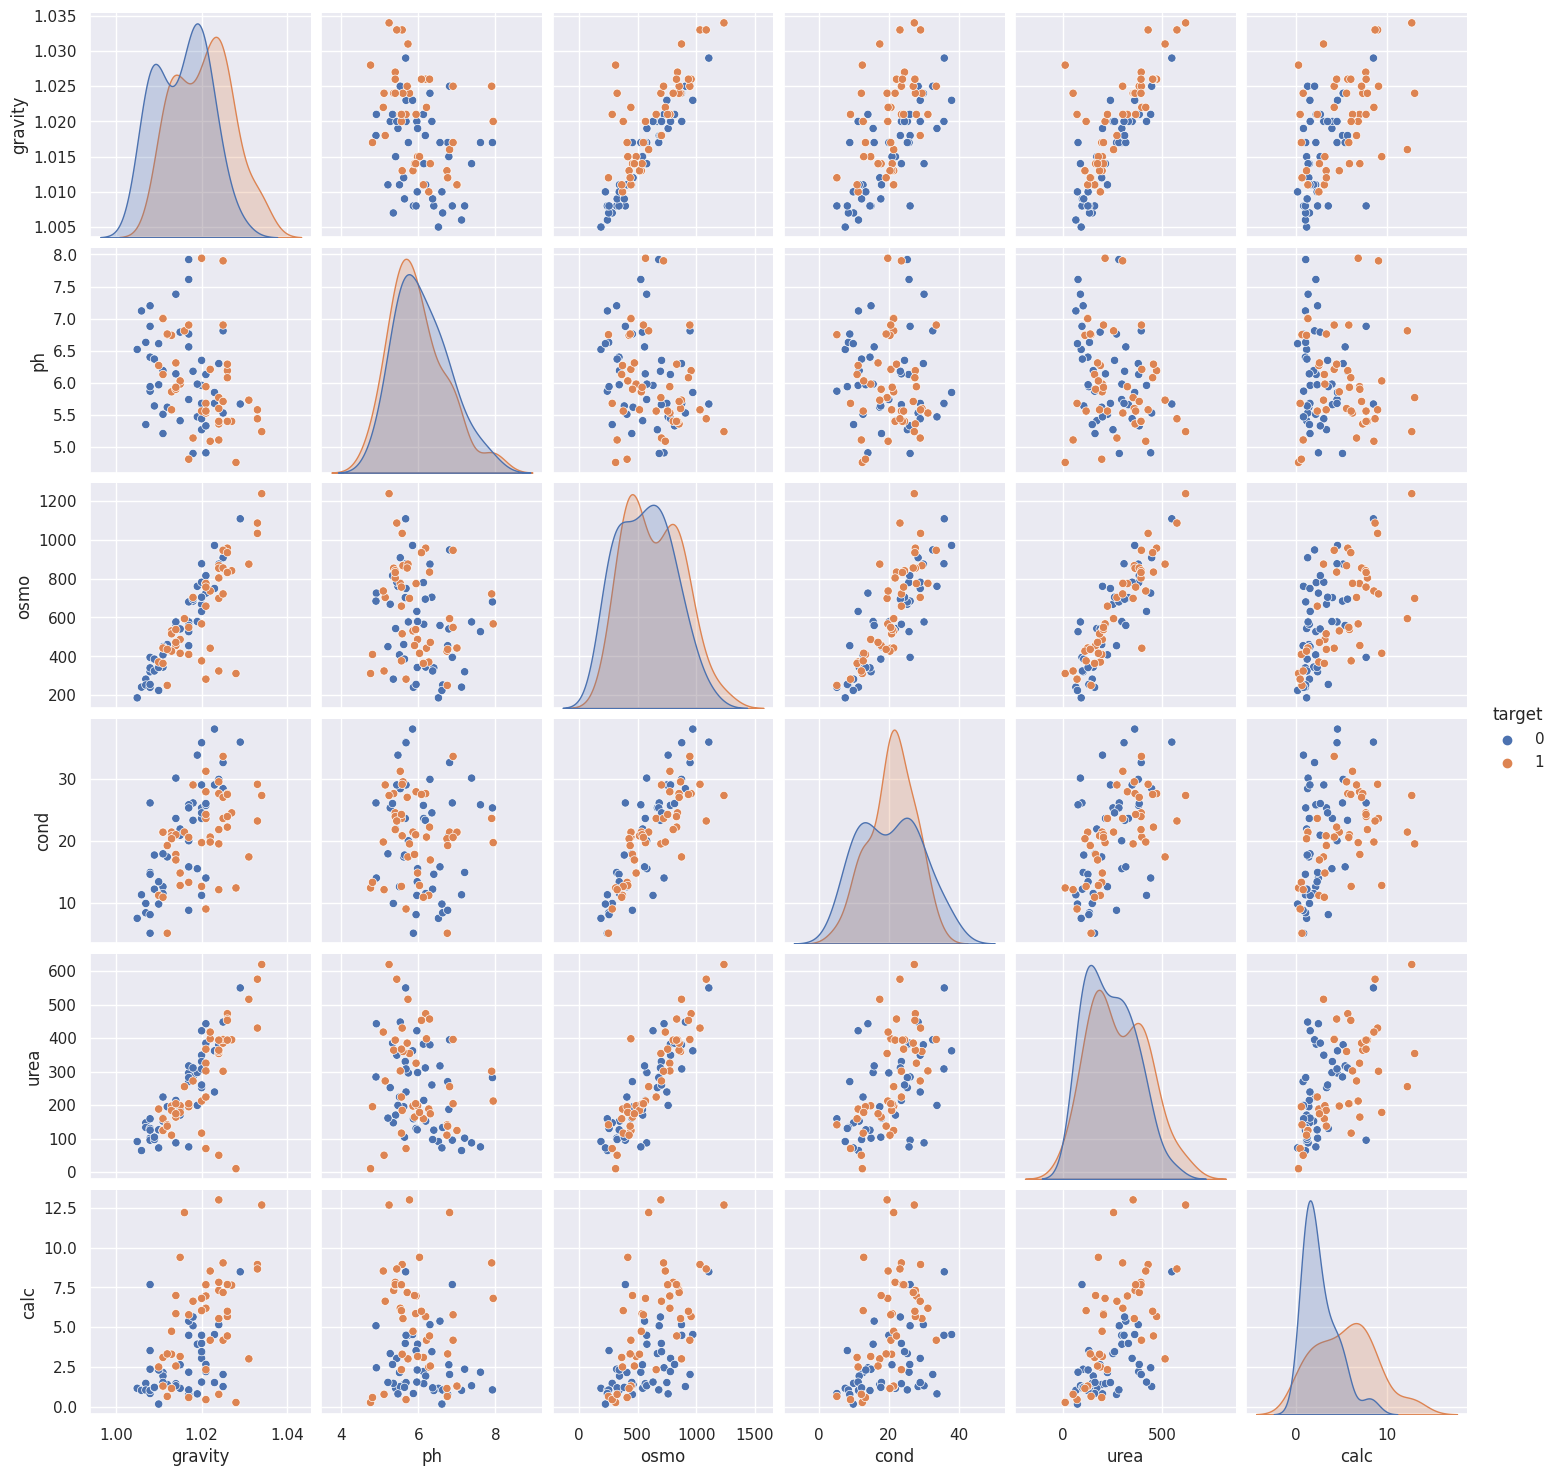

In [12]:
sns.pairplot(df, hue='target')
plt.show()

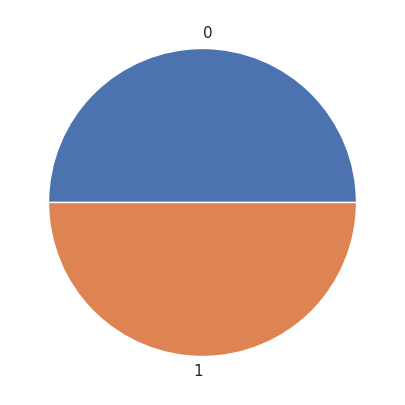

In [13]:
y =df['target']
y.value_counts().plot(kind='pie')
plt.ylabel('')
plt.show()

In [14]:
X = df.drop(columns=['target'])
X.head(10)

,gravity,ph,osmo,cond,urea,calc
0,1.021,4.91,725,14.0,443,2.45
1,1.017,5.74,577,20.0,296,4.49
2,1.008,7.20,321,14.9,101,2.36
3,1.011,5.51,408,12.6,224,2.15
4,1.005,6.52,187,7.5,91,1.16
5,1.020,5.27,668,25.3,252,3.34
6,1.012,5.62,461,17.4,195,1.40
7,1.029,5.67,1107,35.9,550,8.48
8,1.015,5.41,543,21.9,170,1.16
9,1.021,6.13,779,25.7,382,2.21


In [15]:
X.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
gravity,90.0,1.017967,0.006783,1.005,1.01225,1.018,1.0230,1.034
ph,90.0,6.036444,0.711691,4.760,5.53750,5.935,6.4900,7.940
osmo,90.0,602.333333,238.459805,187.000,411.50000,572.000,778.0000,1236.000
cond,90.0,20.621667,7.654533,5.100,14.15000,21.175,26.0750,38.000
urea,90.0,258.200000,135.381127,10.000,148.25000,231.500,366.2500,620.000
calc,90.0,4.017778,3.016139,0.170,1.41250,3.230,5.9625,13.000


In [16]:
Xs = StandardScaler().fit_transform(X)
Xcols = X.columns
X = pd.DataFrame(Xs)
X.columns = Xcols
X.head(10)

,gravity,ph,osmo,cond,urea,calc
0,0.449697,-1.591639,0.517294,-0.869911,1.372682,-0.522708
1,-0.143310,-0.418869,-0.106833,-0.081670,0.280776,0.157442
2,-1.477575,1.644076,-1.186403,-0.751675,-1.167671,-0.552715
3,-1.032820,-0.743853,-0.819518,-1.053834,-0.254035,-0.622730
4,-1.922330,0.683252,-1.751491,-1.723838,-1.241951,-0.952804
5,0.301445,-1.082968,0.276921,0.614609,-0.046053,-0.225976
6,-0.884568,-0.588426,-0.596013,-0.423241,-0.469446,-0.872786
7,1.635710,-0.517777,2.128216,2.007167,2.167472,1.487737
8,-0.439813,-0.885151,-0.250213,0.167939,-0.655144,-0.952804
9,0.449697,0.132192,0.745016,0.667158,0.919578,-0.602726


In [17]:
X.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
gravity,90.0,2.375877e-14,1.005602,-1.922330,-0.847505,0.004942,0.746200,2.376968
ph,90.0,2.723130e-15,1.005602,-1.803585,-0.704997,-0.143339,0.640863,2.689678
osmo,90.0,-1.813364e-16,1.005602,-1.751491,-0.804758,-0.127918,0.740799,2.672218
cond,90.0,5.551115e-17,1.005602,-2.039135,-0.850205,0.072693,0.716423,2.283051
urea,90.0,1.097887e-16,1.005602,-1.843614,-0.816702,-0.198326,0.802588,2.687427
calc,90.0,2.535009e-16,1.005602,-1.282877,-0.868618,-0.262651,0.648384,2.994737


In [18]:
observations = list(df.index)
variables = list(df.columns)

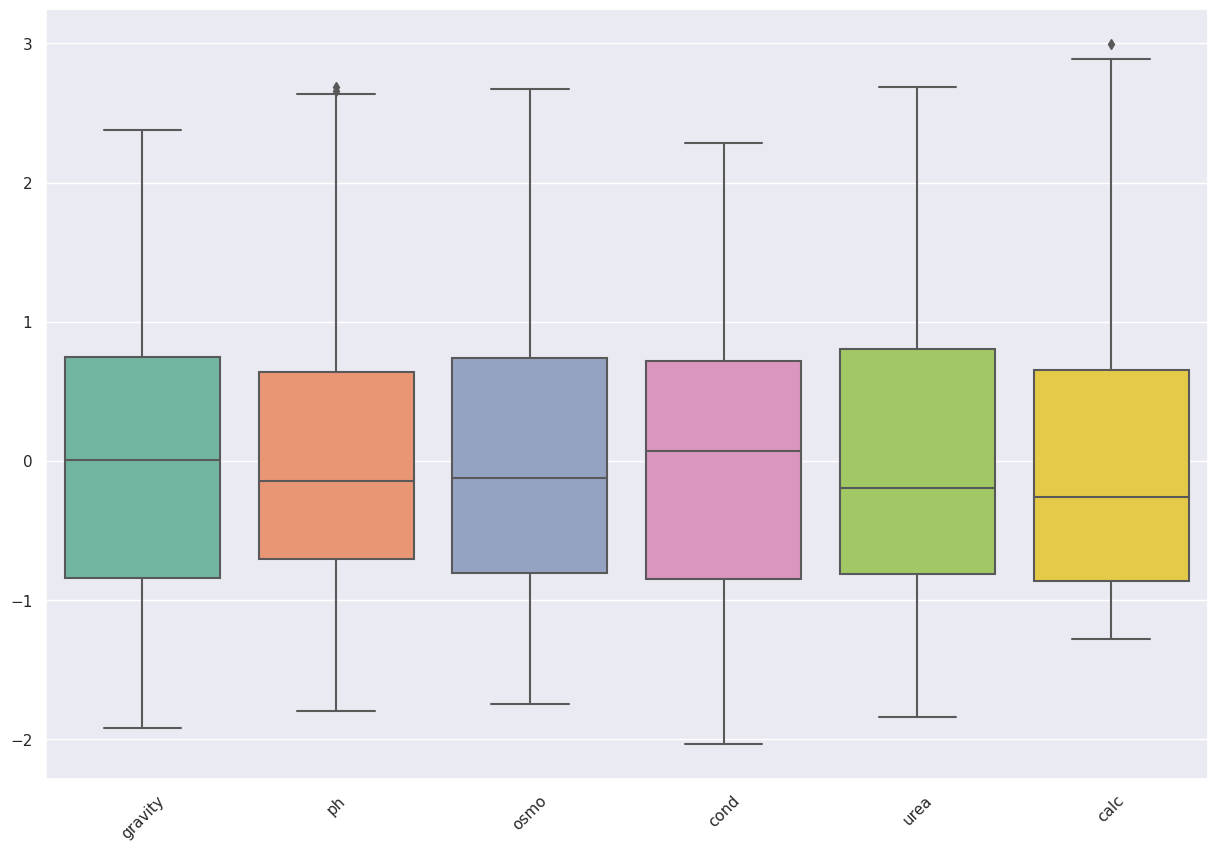

In [19]:
ax = plt.figure(figsize=(15,10))
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:.25'` for same effect.
  warnings.warn(msg, FutureWarning)


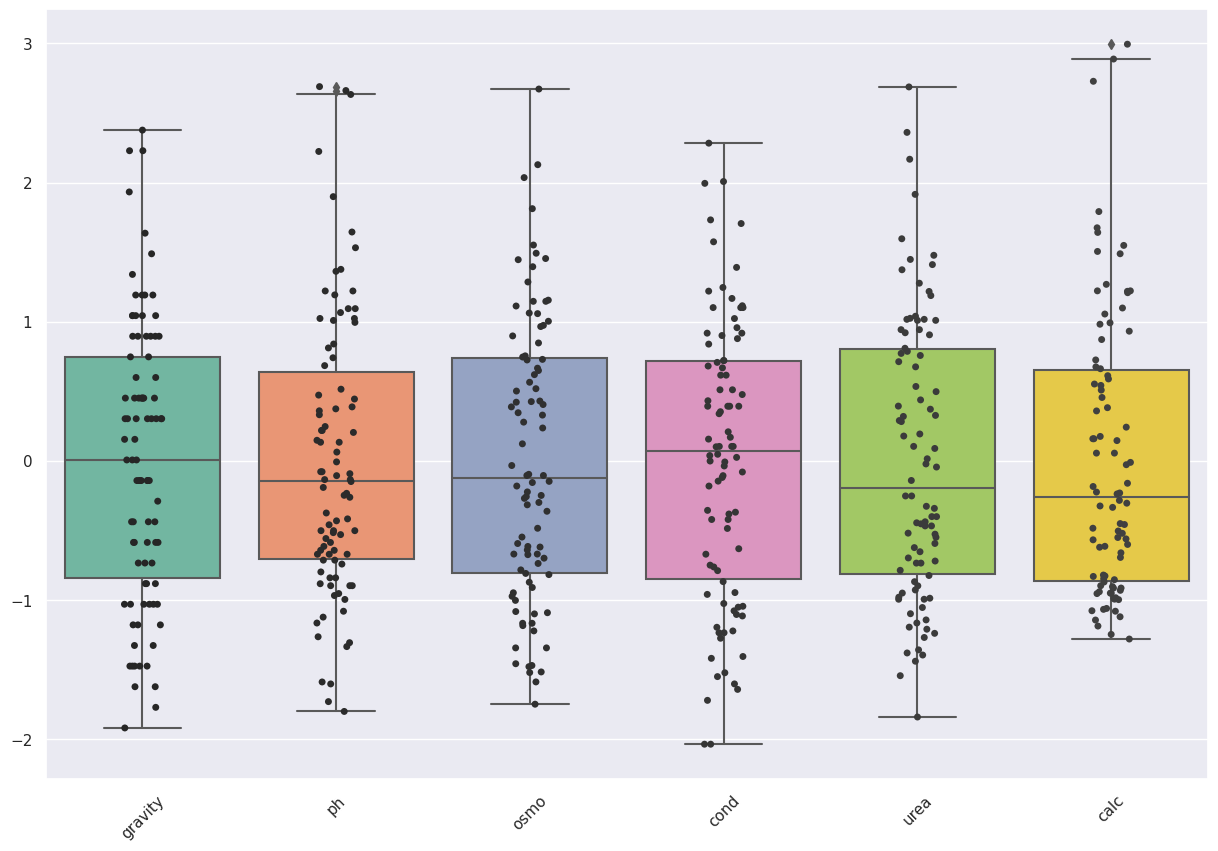

In [20]:
ax = plt.figure(figsize=(15,10))    
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax = sns.stripplot(data=X, color=".25") 
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

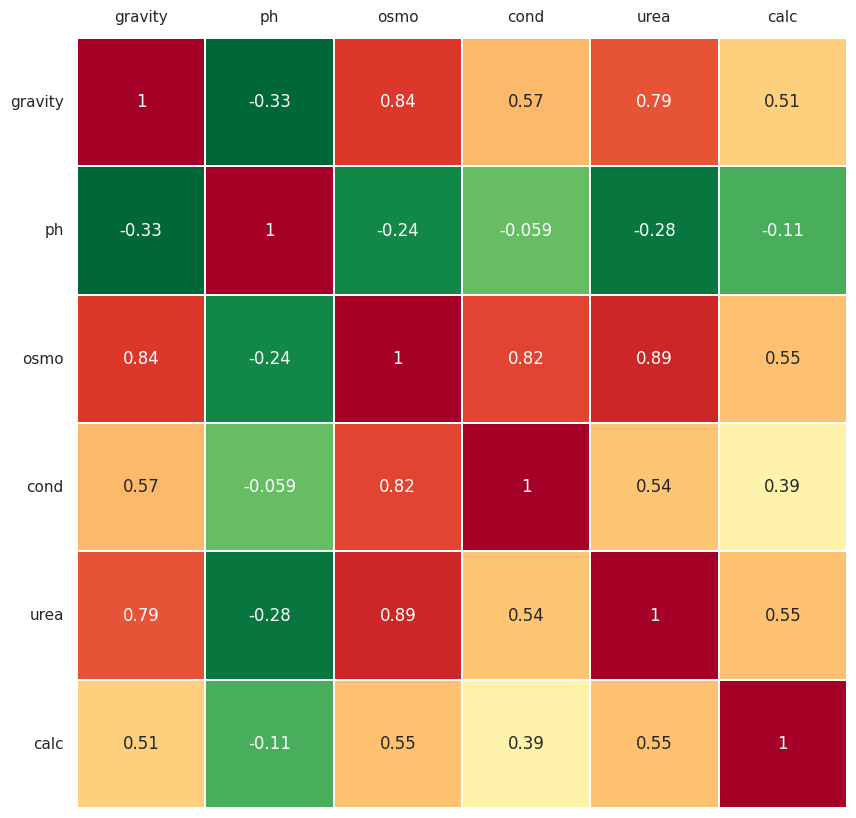

In [21]:
fig1,ax1 = plt.subplots(figsize=(15,10))
ax = sns.heatmap(X.corr(), cmap='RdYlGn_r', linewidths=0.3, annot=True, cbar=False, square=True)
plt.yticks(rotation=0)
ax.tick_params(labelbottom=False,labeltop=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0);

Text(0, 0.5, 'Z2')

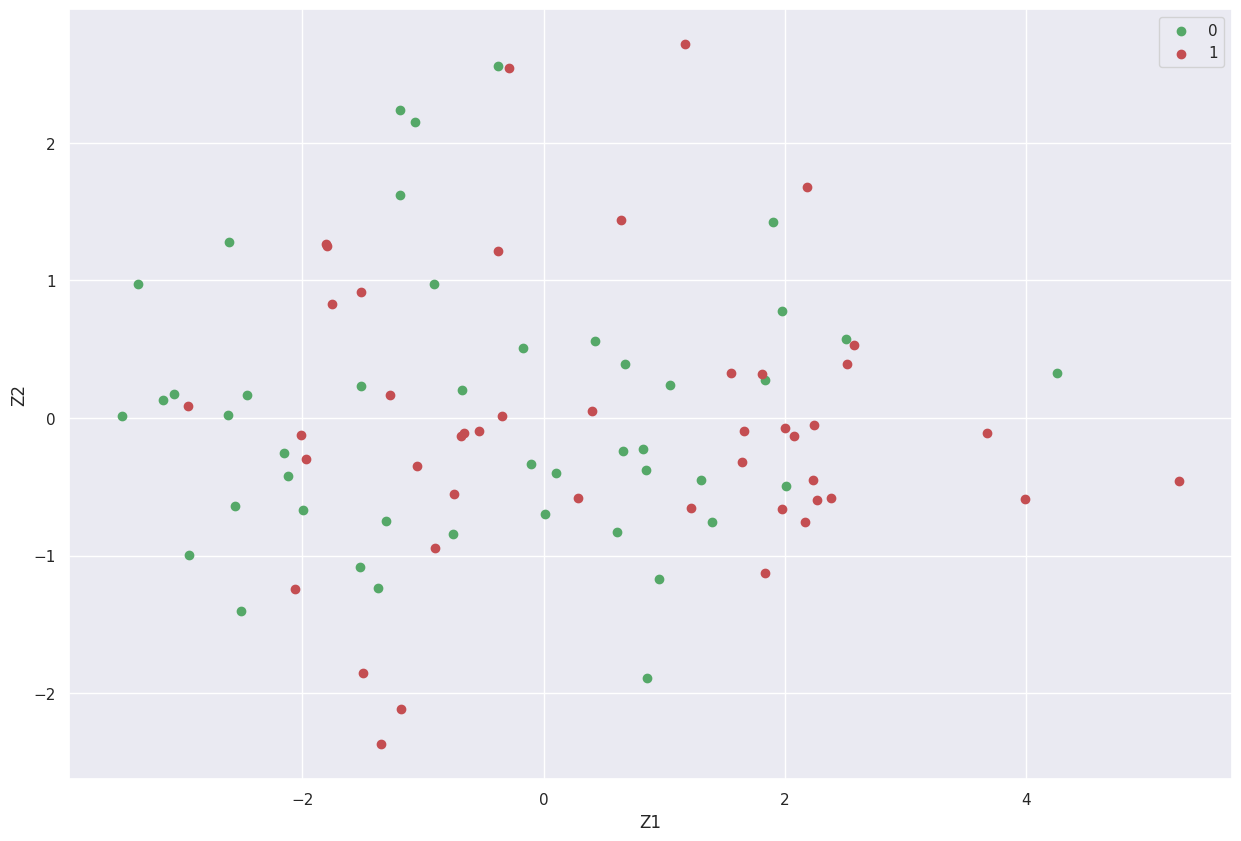

In [22]:
pca = PCA()
Z = pca.fit_transform(X)


idx_0= np.where(y == 0)
idx_1 = np.where(y == 1)


plt. figure(figsize=(15,10))
plt.scatter(Z[idx_0,0], Z[idx_0,1], c='g', label='0')
plt.scatter(Z[idx_1,0], Z[idx_1,1], c='r', label='1')


plt.legend()
plt.xlabel('Z1')
plt.ylabel('Z2')

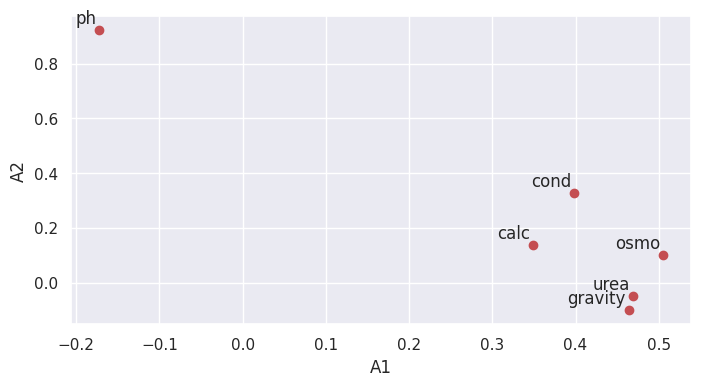

In [23]:
A = pca.components_.T 
plt. figure(figsize=(8,4))

plt.scatter(A[:,0],A[:,1],c='r')
plt.xlabel('A1')
plt.ylabel('A2')
for label, x, y in zip(variables, A[:, 0], A[:, 1]):
  plt.annotate(label, xy=(x, y), xytext=(-2, 2), textcoords='offset points', ha='right', va='bottom')

/usr/local/lib/python3.10/dist-packages/matplotlib/collections.py:963: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


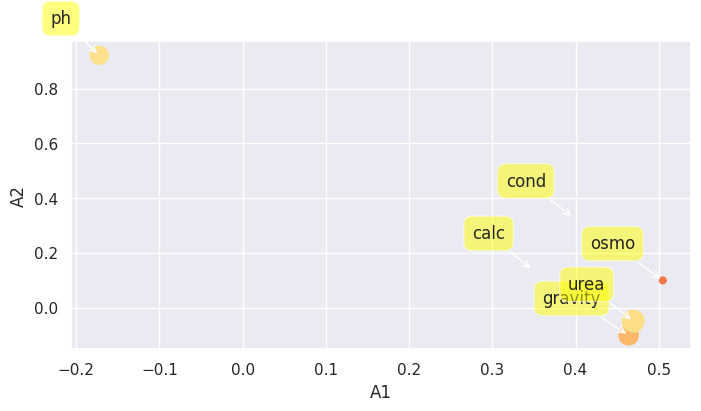

In [24]:
plt. figure(figsize=(8,4))
plt.scatter(A[:, 0],A[:, 1], marker='o', c=A[:, 2], s=A[:, 3]*500, cmap=plt.get_cmap('Spectral'))
plt.xlabel('A1')
plt.ylabel('A2')
for label, x, y in zip(variables,A[:, 0],A[:, 1]):
  plt.annotate(label,xy=(x, y), xytext=(-20, 20),
      textcoords='offset points', ha='right', va='bottom',
      bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
      arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

array([3.75520854, 0.99870373, 0.66148714, 0.41567708, 0.21646847,
       0.01987076])

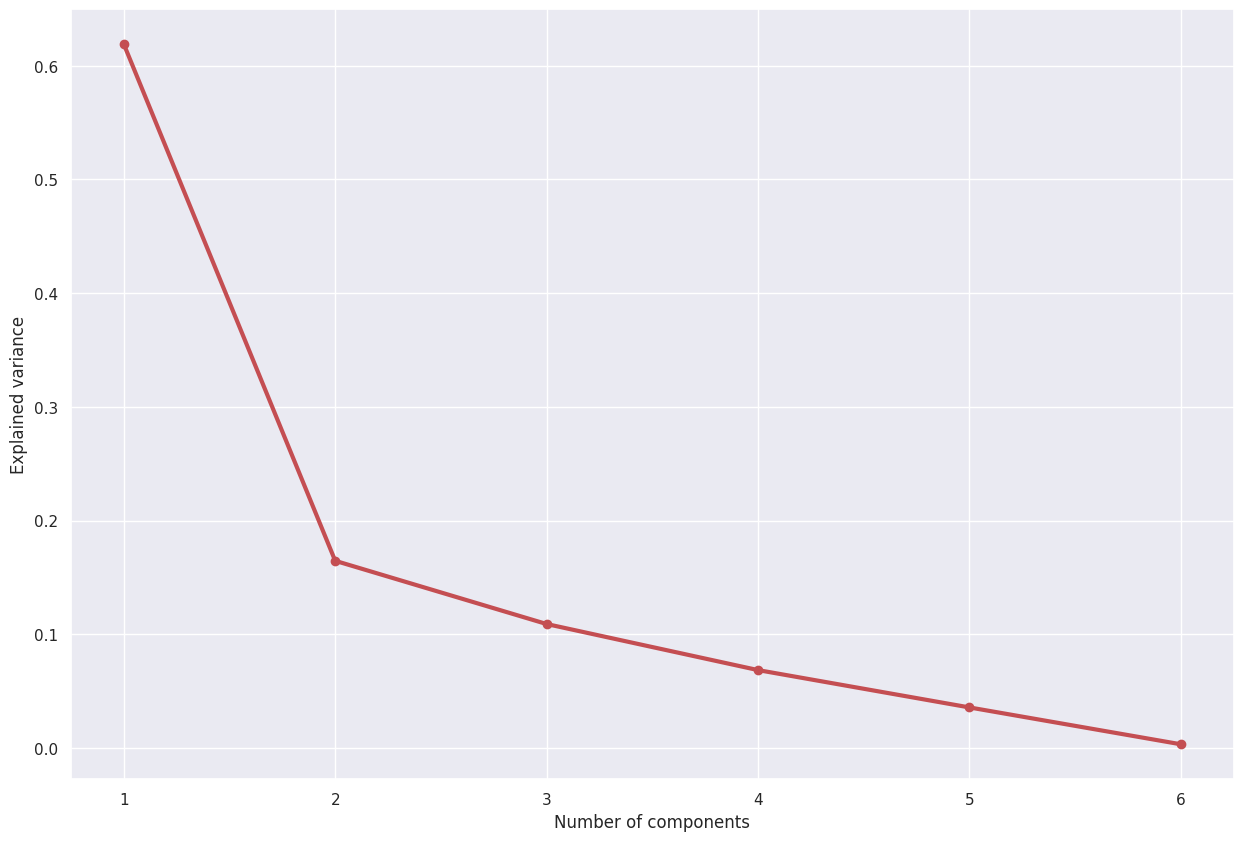

In [25]:
#Eigenvalues
Lambda = pca.explained_variance_ 

#Scree plot
x = np.arange(len(Lambda)) + 1
plt. figure(figsize=(15,10))
plt.plot(x,Lambda/sum(Lambda), 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance')
Lambda

Text(0, 0.5, 'Cumulative explained variance')

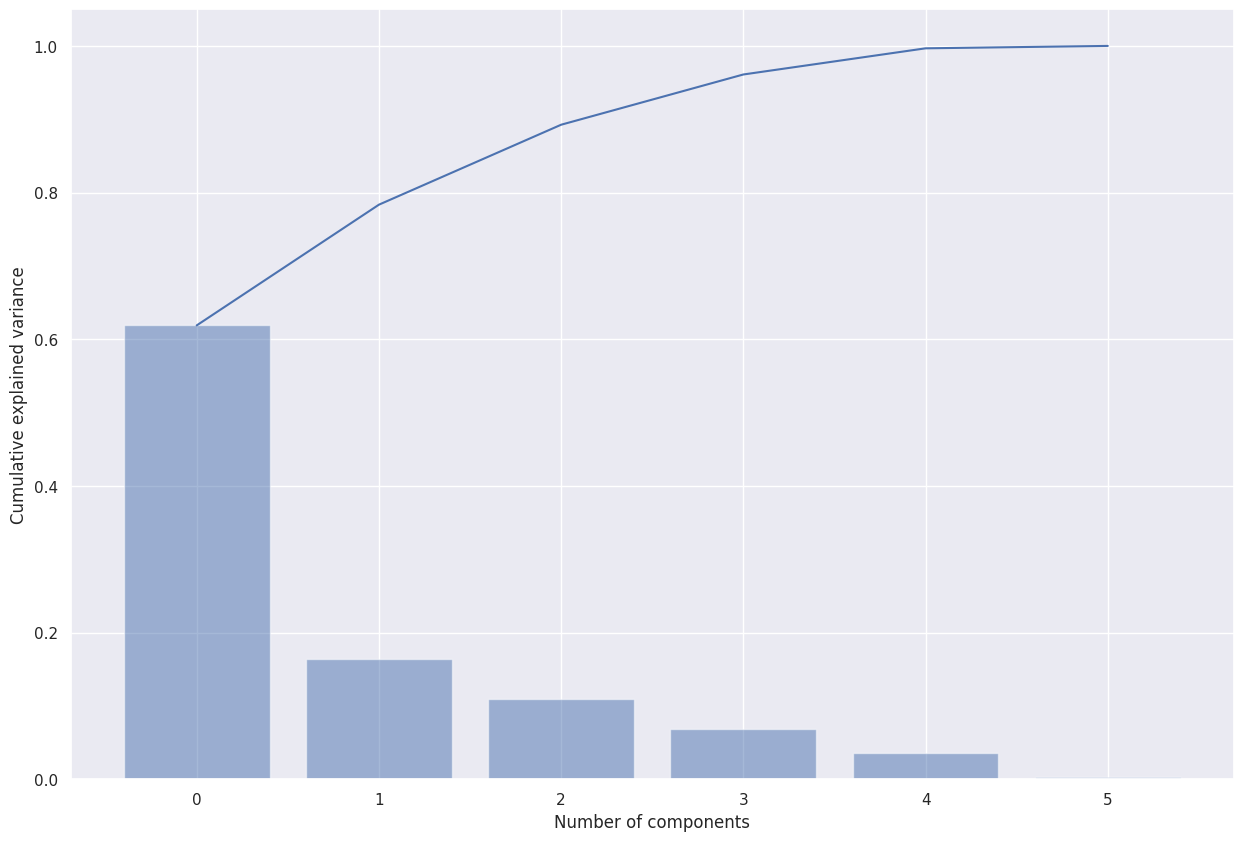

In [26]:
ell = pca.explained_variance_ratio_
ind = np.arange(len(ell))
plt. figure(figsize=(15,10))
plt.bar(ind, ell, align='center', alpha=0.5)
plt.plot(np.cumsum(ell))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

array([-1.88639833, -0.40162983,  1.28167421, -1.08282285,  0.01336108,
       -0.82850386, -0.74863527,  0.32665933, -0.8403214 ,  0.24256261,
       -0.25432814, -0.49574722,  0.97145932, -1.40374694, -1.23284563,
       -1.1714359 ,  0.17316999,  1.42460382,  1.62396194,  0.20591661,
        0.77588224, -0.24358861,  2.14791529, -0.69669701, -0.2234969 ,
        0.23292089,  2.23948331,  0.13299378, -0.99927638, -0.44872253,
        2.56034192, -0.33793777,  0.51130895, -0.63851984,  0.57244403,
       -0.37841496,  0.16455307,  0.56233135,  0.01817118,  0.39554965,
       -0.75262077, -0.67148798,  0.97570785, -0.41819875,  0.27855143,
        0.32523688, -0.07049238, -0.13249774, -0.09309601, -0.45345363,
       -0.09702428, -0.1242285 ,  1.26293414,  0.05421307, -0.29959179,
       -0.75852657,  2.54030355, -0.57891808, -0.05123772,  0.52732522,
       -0.45912061, -0.11069177, -0.34624453, -0.55515192, -0.13202617,
        0.09053129,  1.68196529,  0.32307172, -2.37106889, -0.58

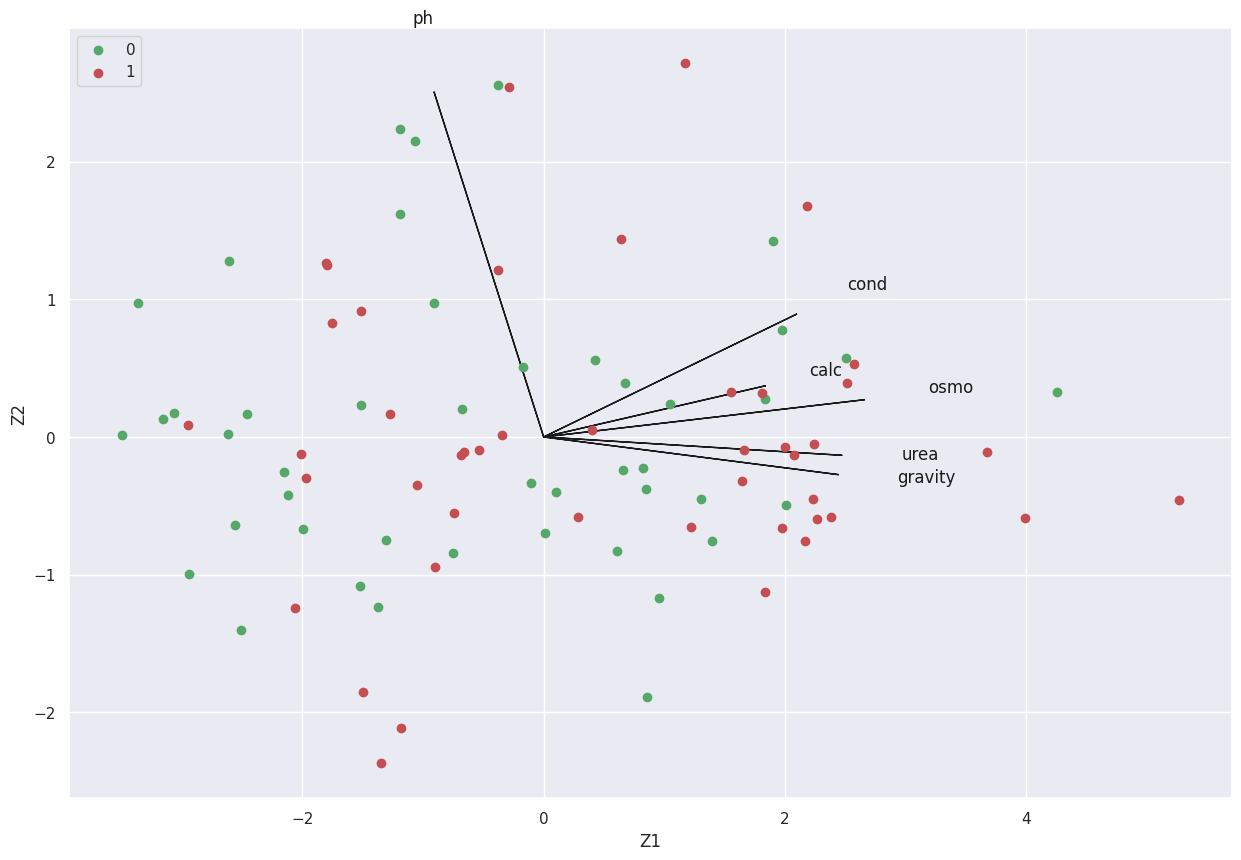

In [27]:
A1 = A[:,0] 
A2 = A[:,1]
Z1 = Z[:,0] 
Z2 = Z[:,1]

plt. figure(figsize=(15,10))
plt.xlabel('Z1')
plt.ylabel('Z2')
for i in range(len(A1)):
# arrows project features as vectors onto PC axes
  plt.arrow(0, 0, A1[i]*max(Z1), A2[i]*max(Z2), color='k', width=0.0005, head_width=0.0025)
  plt.text(A1[i]*max(Z1)*1.2, A2[i]*max(Z2)*1.2,variables[i], color='k')

plt.scatter(Z[idx_0,0], Z[idx_0,1], c='g', label='0')
plt.scatter(Z[idx_1,0], Z[idx_1,1], c='r', label='1')

plt.legend(loc='upper left')
Z1
Z2

In [28]:
!pip install pca

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [29]:
from pca import pca
# Initialize and keep all PCs
model = pca()
# Fit transform
out = model.fit_transform(X)

[pca] >Extracting column labels from dataframe.
[pca] >Extracting row labels from dataframe.
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [6] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [4] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [6] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[4]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


In [30]:
out['PC']

,PC1,PC2,PC3,PC4
0,0.860045,-1.886398,-0.182769,1.048631
1,0.106006,-0.401630,0.189546,-0.071113
2,-2.607743,1.281674,0.232275,0.025754
3,-1.520258,-1.082823,0.123291,0.066155
4,-3.494852,0.013361,0.423220,0.212741
...,...,...,...,...
85,1.644945,-0.318436,0.663922,-0.363705
86,-0.378246,1.214586,0.610398,-0.057792
87,3.988664,-0.591798,0.719918,1.040068
88,-1.496506,-1.853069,-0.366623,0.178975


[pca]> [WARNING]: De parameter <label> is deprecated and will not be supported in future version.


(<Figure size 2500x1500 with 1 Axes>,
 <Axes: title={'center': '4 Principal Components explain [99.67%] of the variance'}, xlabel='PC1 (61.8% expl.var)', ylabel='PC2 (16.4% expl.var)'>)

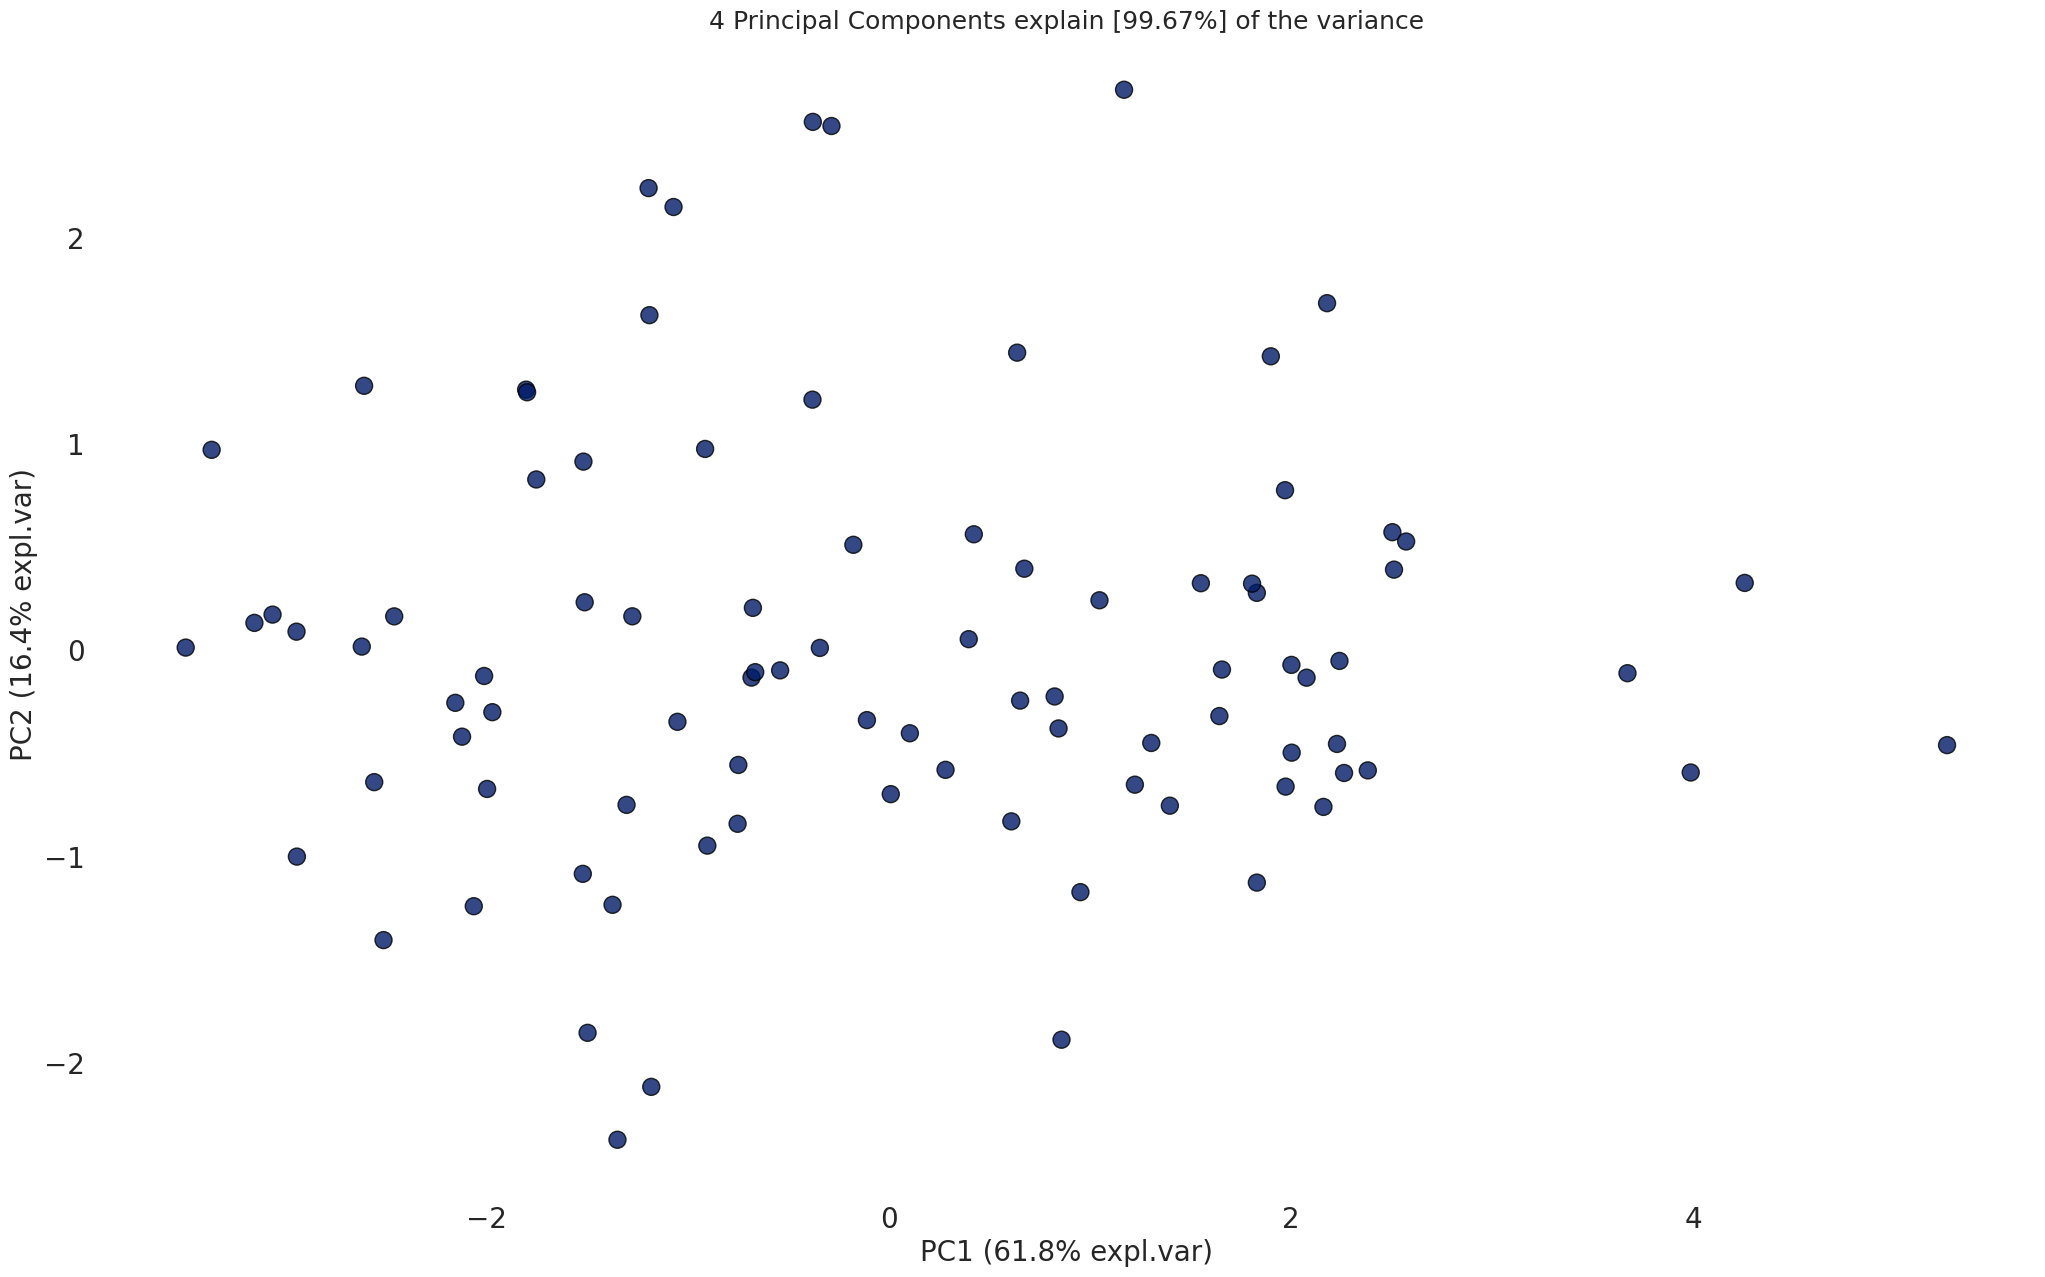

In [31]:
model.scatter(label=True, legend=False)

In [32]:
A = out['loadings'].T
A

,PC1,PC2,PC3,PC4
gravity,0.463840,-0.100688,-0.051407,0.383069
ph,-0.172460,0.922440,0.060776,0.334381
osmo,0.504900,0.099699,-0.192087,0.046316
cond,0.397891,0.328477,-0.476142,-0.613390
urea,0.469303,-0.048966,0.049618,0.482591
calc,0.348746,0.136865,0.852991,-0.360777


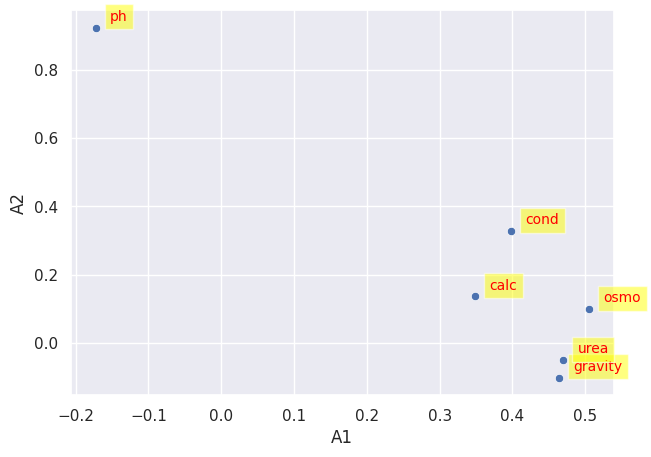

In [33]:
sns.scatterplot(data=A, x="PC1", y="PC2")
plt.xlabel('A1')
plt.ylabel('A2')
for i in range(A.shape[0]):
 plt.text(x=A.PC1[i]+0.02,y=A.PC2[i]+0.02, s=variables[i],
          fontdict=dict(color='red',size=10),
          bbox=dict(facecolor='yellow',alpha=0.5))

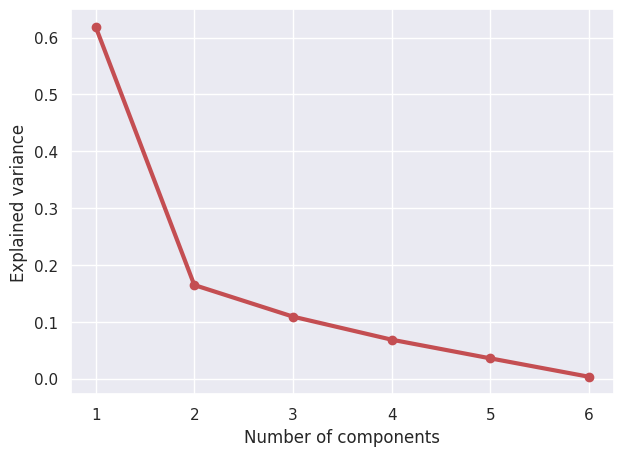

In [34]:
VR = out['variance_ratio']
x = np.arange(len(VR)) + 1
plt.plot(x, VR, 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance') 
plt.show()

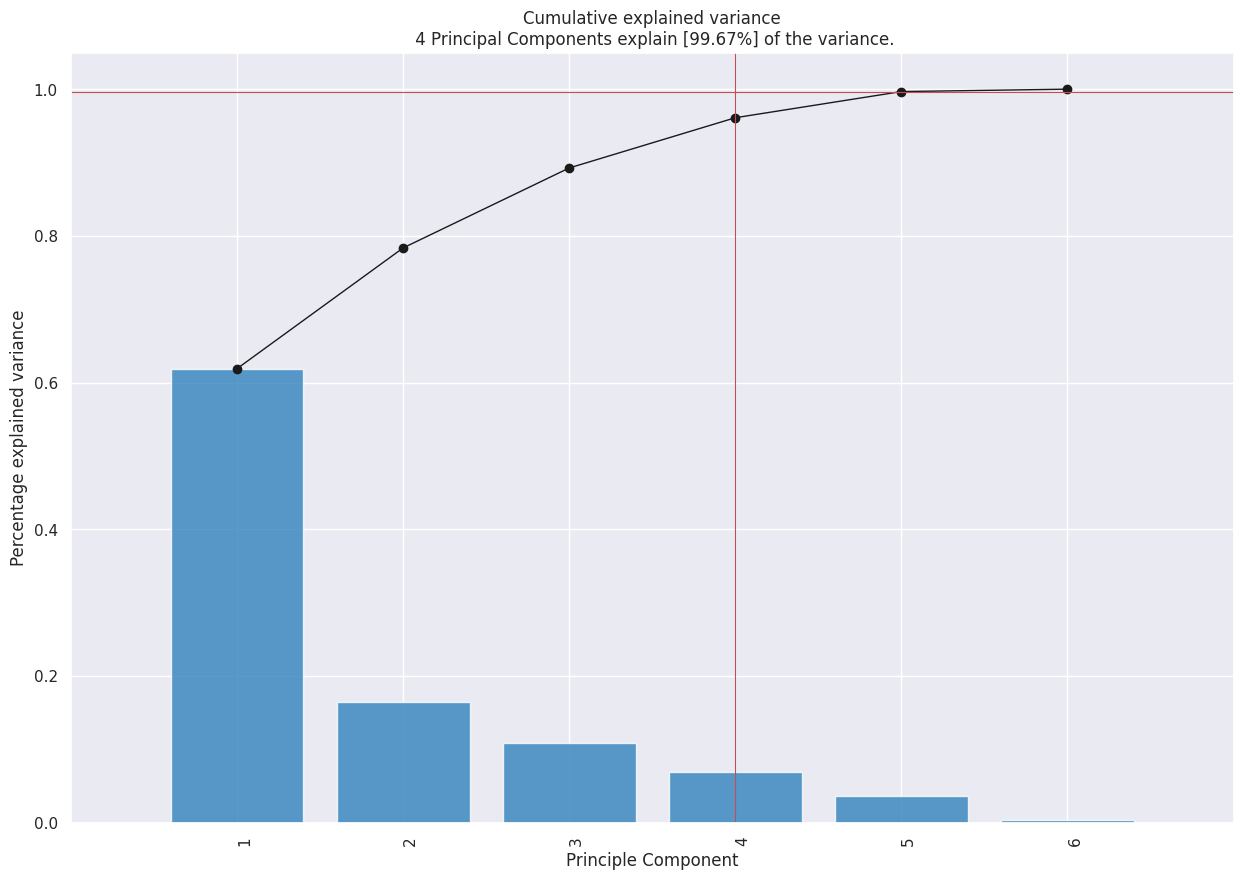

<Figure size 700x500 with 0 Axes>

In [35]:
model.plot();

[pca]> [WARNING]: De parameter <label> is deprecated and will not be supported in future version.
[pca] >Plot PC1 vs PC2 with loadings.


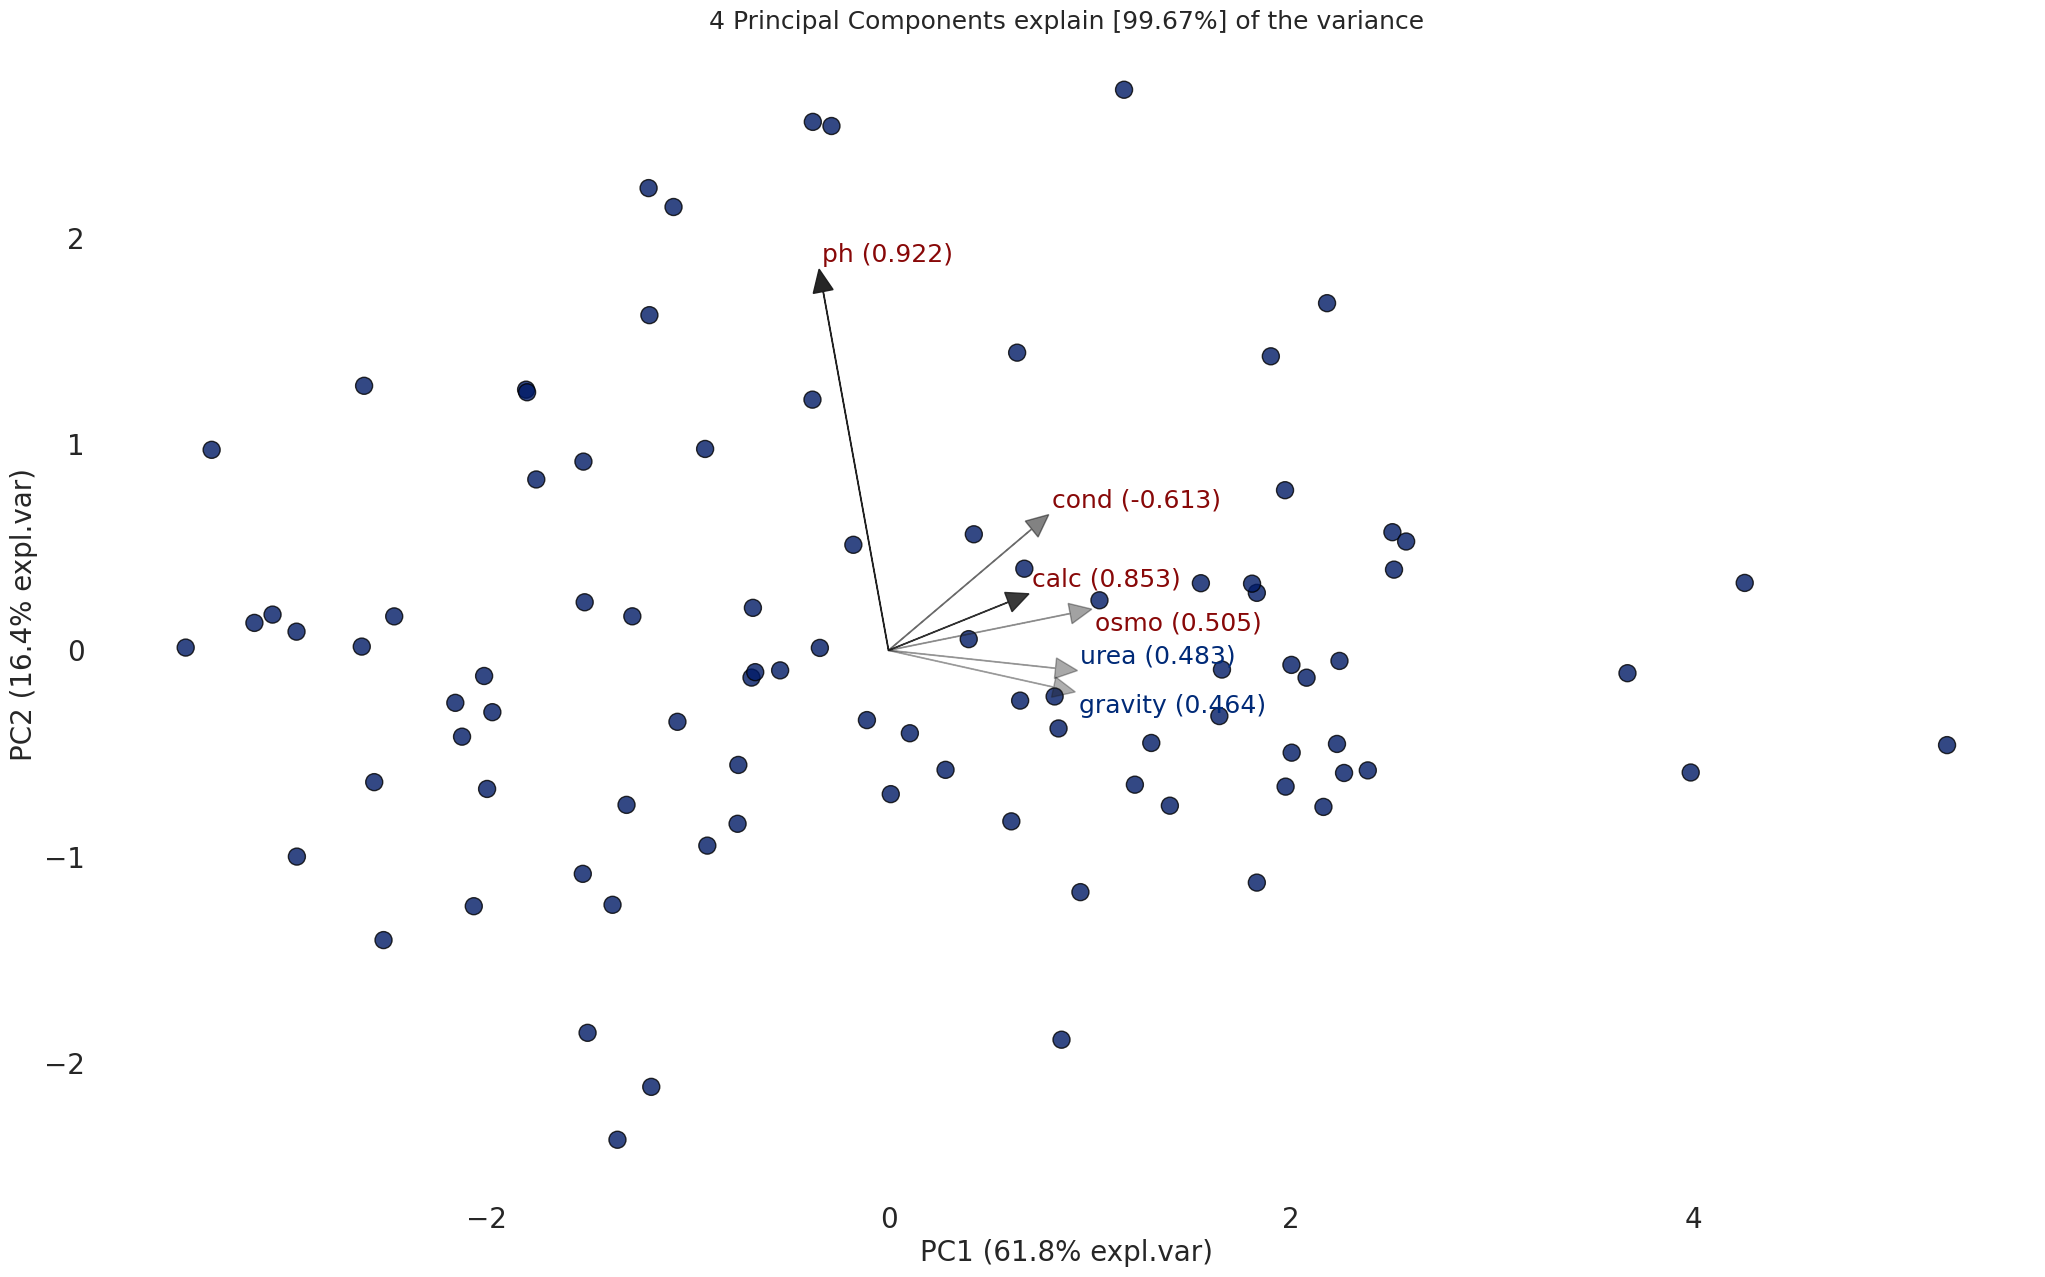

(<Figure size 2500x1500 with 1 Axes>,
 <Axes: title={'center': '4 Principal Components explain [99.67%] of the variance'}, xlabel='PC1 (61.8% expl.var)', ylabel='PC2 (16.4% expl.var)'>)

In [36]:
model.biplot(label=False, legend=False, color_arrow='k')

[pca] >Plot PC1 vs PC2 vs PC3 with loadings.


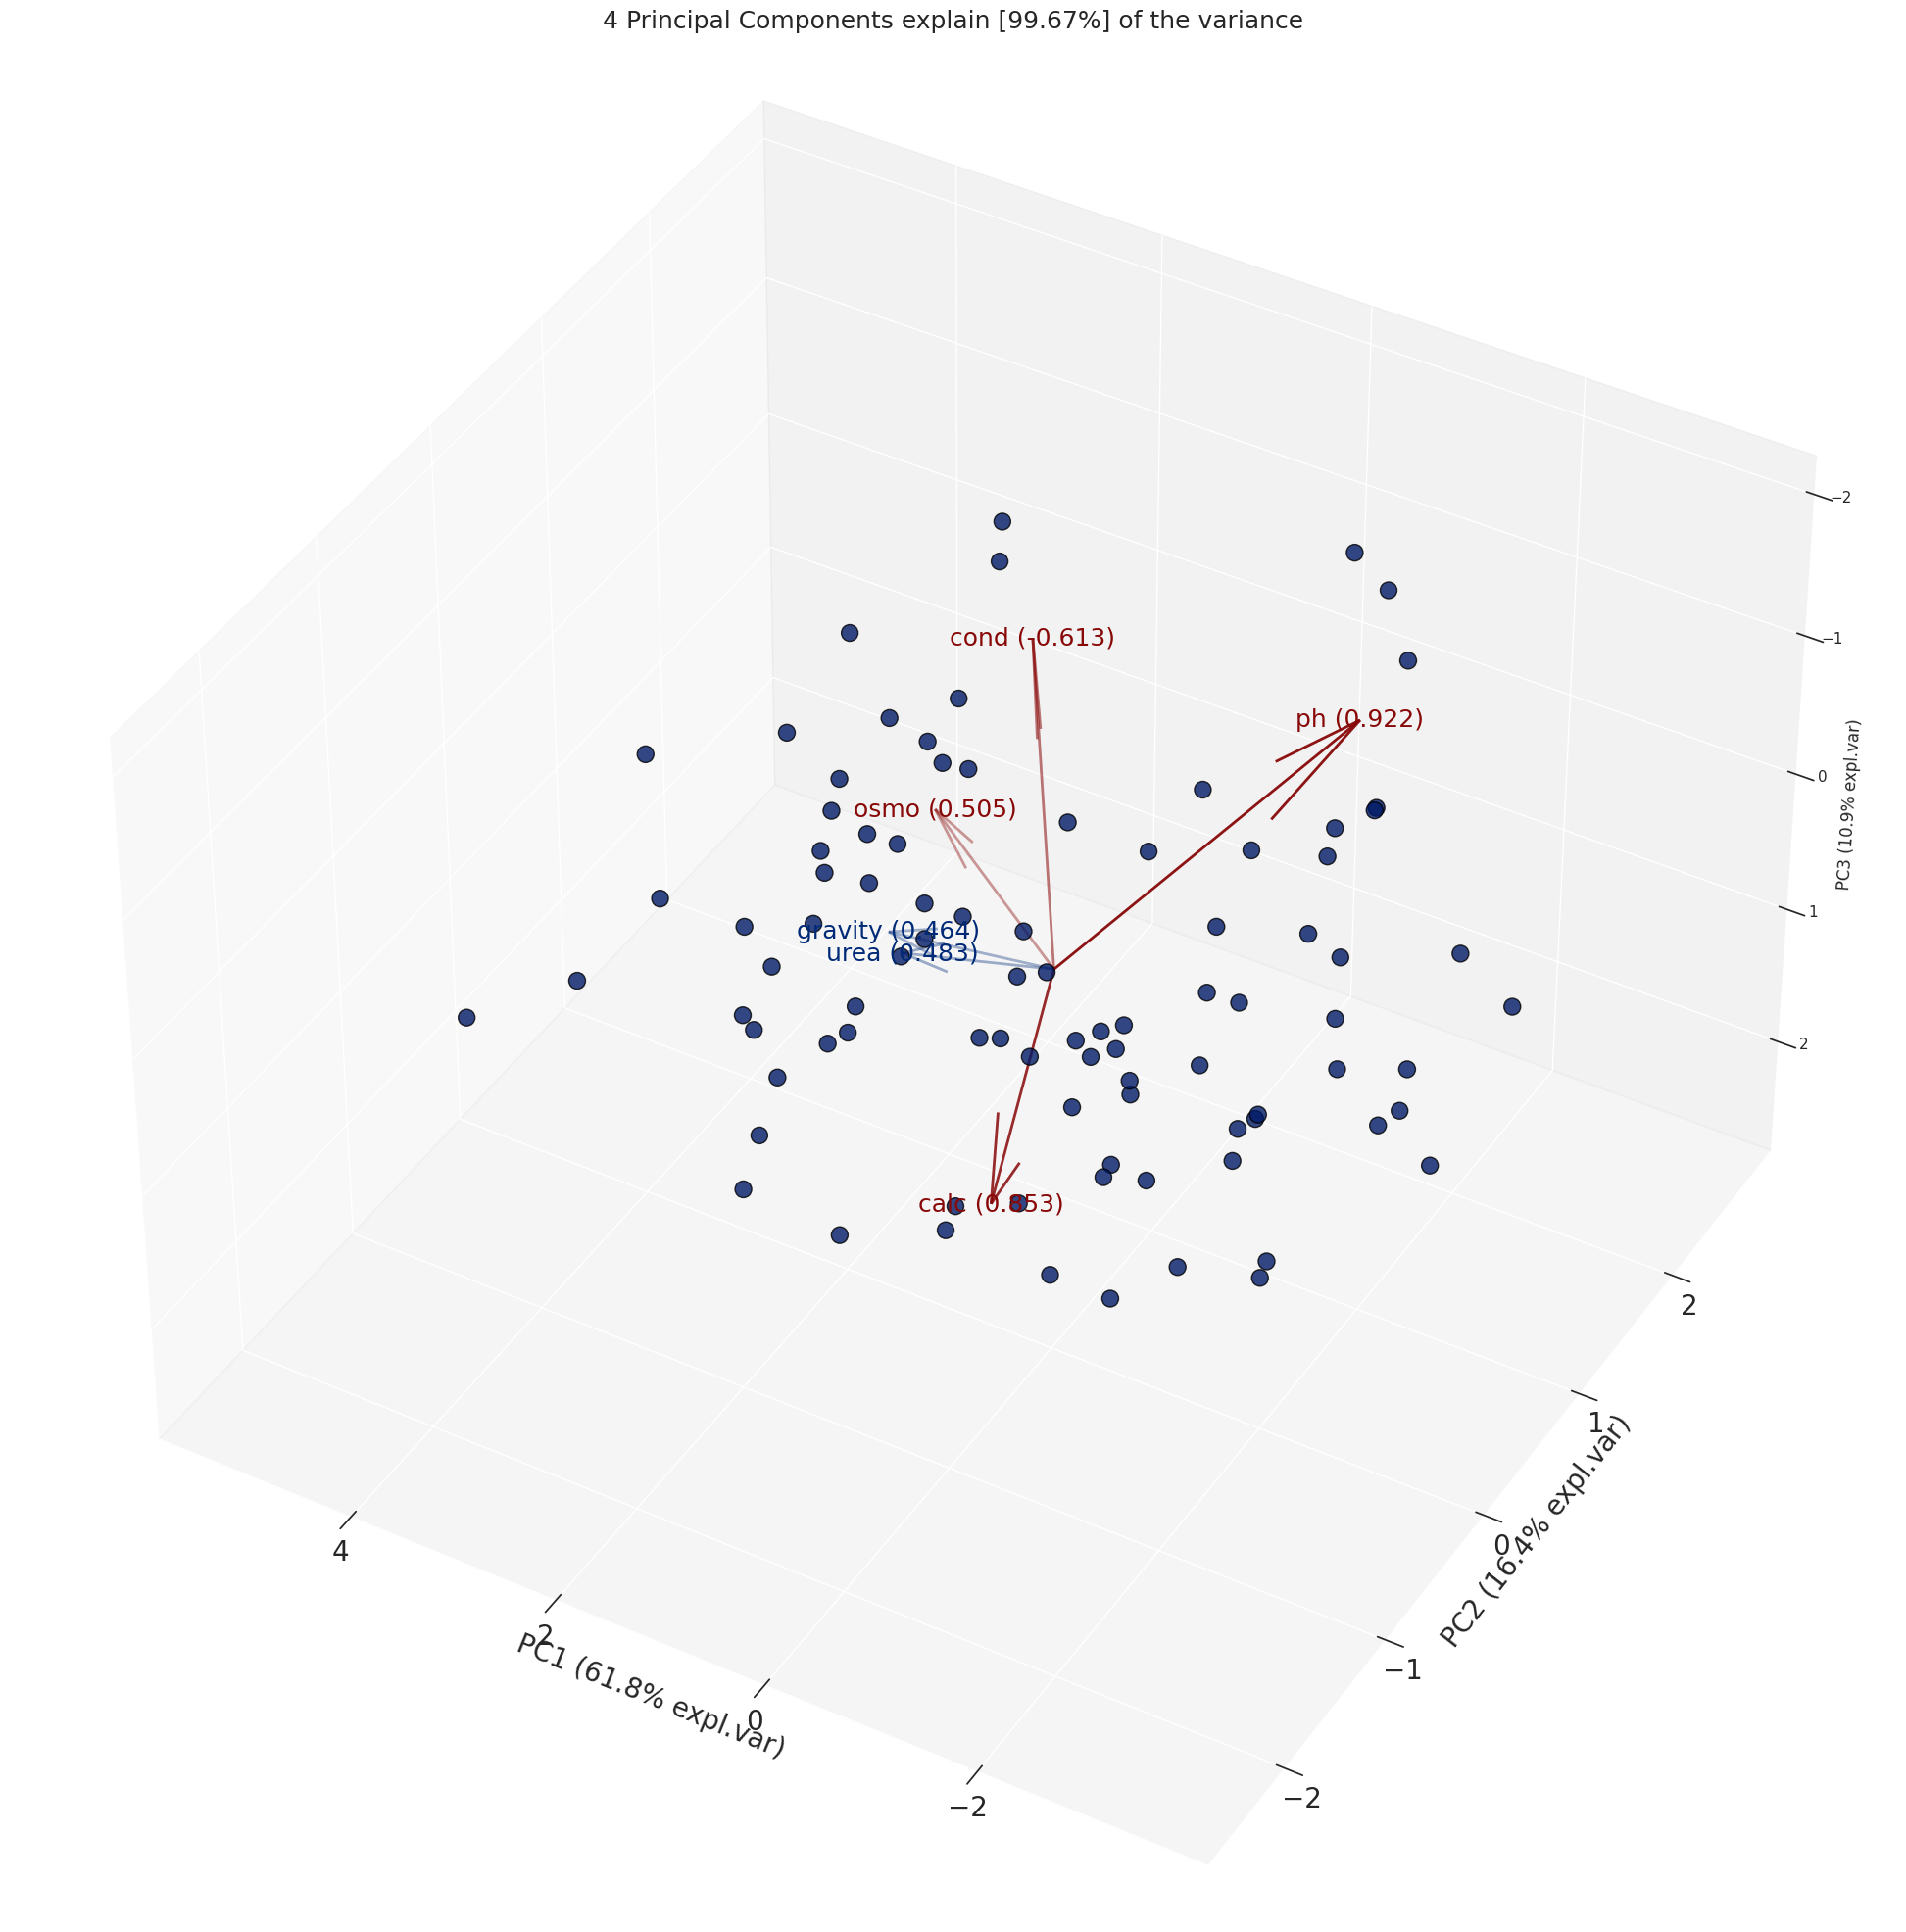

(<Figure size 3000x2500 with 1 Axes>,
 <Axes3D: title={'center': '4 Principal Components explain [99.67%] of the variance'}, xlabel='PC1 (61.8% expl.var)', ylabel='PC2 (16.4% expl.var)', zlabel='PC3 (10.9% expl.var)'>)

In [37]:
model.biplot3d(legend=False)

In [38]:
from pycaret.utils import version
version()

'3.0.0'

In [39]:
data = df.sample(frac=0.9, random_state=786)
data_unseen = df.drop(data.index)
#dr = df.drop(columns=['id'])

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (81, 7)
Unseen Data For Predictions: (9, 7)


In [40]:
from pycaret.classification import *
clf = setup(data=data, target='target', train_size=0.7, session_id=123)

,Description,Value
0,Session id,123
1,Target,target
2,Target type,Binary
3,Original data shape,"(81, 7)"
4,Transformed data shape,"(81, 7)"
5,Transformed train set shape,"(56, 7)"
6,Transformed test set shape,"(25, 7)"
7,Numeric features,6
8,Preprocess,True
9,Imputation type,simple


In [41]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.8633,0.9333,0.8333,0.8250,0.8171,0.7282,0.7495,0.5200
qda,Quadratic Discriminant Analysis,0.8200,0.8778,0.8333,0.8500,0.8148,0.6397,0.6695,0.0540
ada,Ada Boost Classifier,0.8100,0.8611,0.7667,0.7917,0.7638,0.6231,0.6495,0.2350
xgboost,Extreme Gradient Boosting,0.8033,0.8667,0.7500,0.7917,0.7505,0.5994,0.6274,0.0850
lda,Linear Discriminant Analysis,0.8000,0.8778,0.7167,0.7833,0.7433,0.5949,0.6040,0.1010
lightgbm,Light Gradient Boosting Machine,0.7967,0.8556,0.7167,0.8083,0.7290,0.5947,0.6268,0.1710
gbc,Gradient Boosting Classifier,0.7600,0.8389,0.7500,0.7083,0.7190,0.5244,0.5374,0.2680
nb,Naive Bayes,0.7533,0.8722,0.8000,0.7267,0.7502,0.4918,0.5006,0.0900
ridge,Ridge Classifier,0.7533,0.0000,0.6167,0.7333,0.6600,0.4994,0.5039,0.0720
lr,Logistic Regression,0.7467,0.7833,0.6833,0.7250,0.6790,0.4897,0.5154,0.5300


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [42]:
best_model

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     n_estimators=100, n_jobs=-1, oob_score=False,
                     random_state=123, verbose=0, warm_start=False)

In [43]:
lr = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,0.6667,0.6667,0.3333,1.0000,0.5000,0.3333,0.4472
2,0.6667,0.5556,0.6667,0.6667,0.6667,0.3333,0.3333
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,0.5000,0.4444,0.0000,0.0000,0.0000,0.0000,0.0000
5,0.8333,1.0000,1.0000,0.7500,0.8571,0.6667,0.7071
6,0.8000,1.0000,1.0000,0.6667,0.8000,0.6154,0.6667
7,0.6000,0.6667,0.5000,0.5000,0.5000,0.1667,0.1667
8,0.6000,0.8333,0.6667,0.6667,0.6667,0.1667,0.1667


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [44]:
tuned_lr=tune_model(lr)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,0.6667,0.6667,0.6667,0.6667,0.6667,0.3333,0.3333
2,0.6667,0.4444,0.6667,0.6667,0.6667,0.3333,0.3333
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,0.5000,0.5556,0.0000,0.0000,0.0000,0.0000,0.0000
5,0.8333,1.0000,1.0000,0.7500,0.8571,0.6667,0.7071
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,0.8000,0.8333,0.5000,1.0000,0.6667,0.5455,0.6124
8,0.6000,0.8333,0.6667,0.6667,0.6667,0.1667,0.1667


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [45]:
tuned_lr

LogisticRegression(C=0.049, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

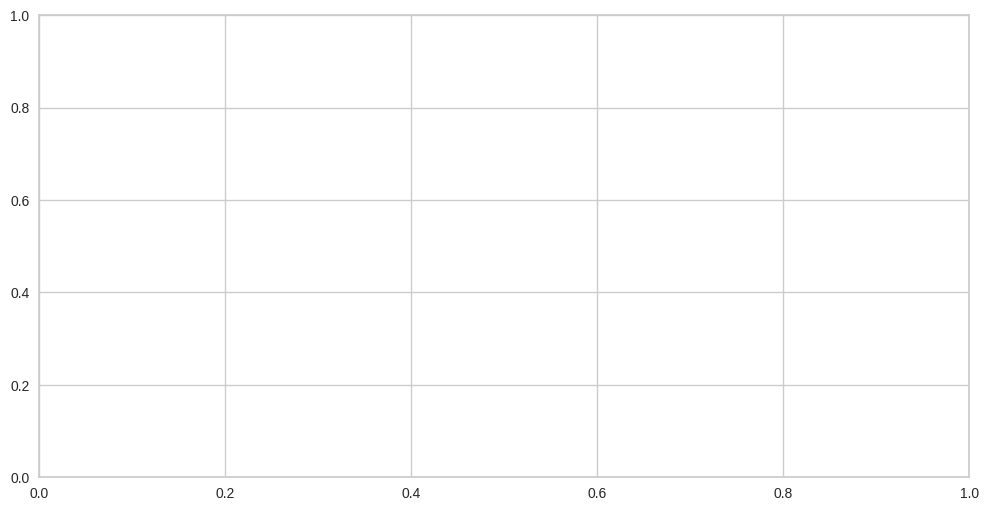

In [46]:
evaluate_model(tuned_lr)

In [47]:
knn = create_model('knn')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8333,0.6667,1.0000,0.7500,0.8571,0.6667,0.7071
1,0.1667,0.2778,0.0000,0.0000,0.0000,-0.6667,-0.7071
2,0.3333,0.3889,0.3333,0.3333,0.3333,-0.3333,-0.3333
3,0.6667,0.8889,1.0000,0.6000,0.7500,0.3333,0.4472
4,0.8333,0.9444,0.6667,1.0000,0.8000,0.6667,0.7071
5,0.1667,0.2778,0.3333,0.2500,0.2857,-0.6667,-0.7071
6,0.8000,0.8333,1.0000,0.6667,0.8000,0.6154,0.6667
7,0.8000,1.0000,1.0000,0.6667,0.8000,0.6154,0.6667
8,0.6000,0.4167,1.0000,0.6000,0.7500,0.0000,0.0000


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [48]:
tuned_knn = tune_model(knn)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8333,0.9444,0.6667,1.0000,0.8000,0.6667,0.7071
1,0.3333,0.4444,0.3333,0.3333,0.3333,-0.3333,-0.3333
2,0.8333,0.6667,1.0000,0.7500,0.8571,0.6667,0.7071
3,0.6667,0.6667,1.0000,0.6000,0.7500,0.3333,0.4472
4,0.5000,0.7222,0.3333,0.5000,0.4000,0.0000,0.0000
5,0.5000,0.7222,1.0000,0.5000,0.6667,0.0000,0.0000
6,0.6000,0.8333,0.5000,0.5000,0.5000,0.1667,0.1667
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,0.8000,0.7500,1.0000,0.7500,0.8571,0.5455,0.6124


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [49]:
tuned_knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
                     metric_params=None, n_jobs=-1, n_neighbors=16, p=2,
                     weights='uniform')

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

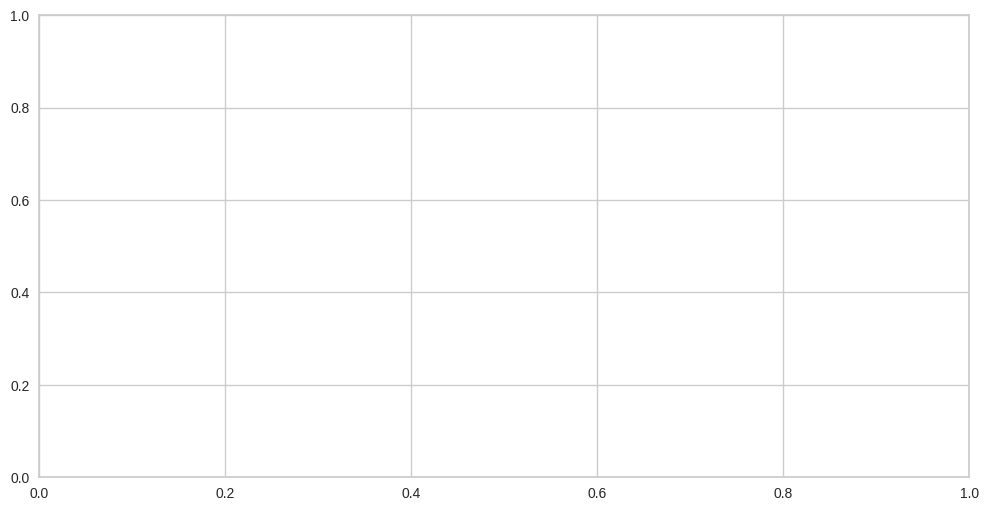

In [50]:
evaluate_model(tuned_knn)

In [51]:
qda=create_model('qda')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,0.6667,0.7778,0.3333,1.0000,0.5000,0.3333,0.4472
2,0.8333,0.7778,1.0000,0.7500,0.8571,0.6667,0.7071
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,0.6667,0.8889,0.6667,0.6667,0.6667,0.3333,0.3333
5,0.8333,1.0000,1.0000,0.7500,0.8571,0.6667,0.7071
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,0.8000,0.8333,1.0000,0.6667,0.8000,0.6154,0.6667
8,0.6000,0.6667,0.6667,0.6667,0.6667,0.1667,0.1667


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [52]:
tuned_qda=tune_model(qda)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,0.8333,0.7778,0.6667,1.0000,0.8000,0.6667,0.7071
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,0.5000,0.8889,0.0000,0.0000,0.0000,0.0000,0.0000
5,0.6667,1.0000,1.0000,0.6000,0.7500,0.3333,0.4472
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,0.8000,0.5000,0.5000,1.0000,0.6667,0.5455,0.6124
8,0.6000,0.6667,0.6667,0.6667,0.6667,0.1667,0.1667


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [53]:
tuned_qda

QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
                              store_covariance=False, tol=0.0001)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

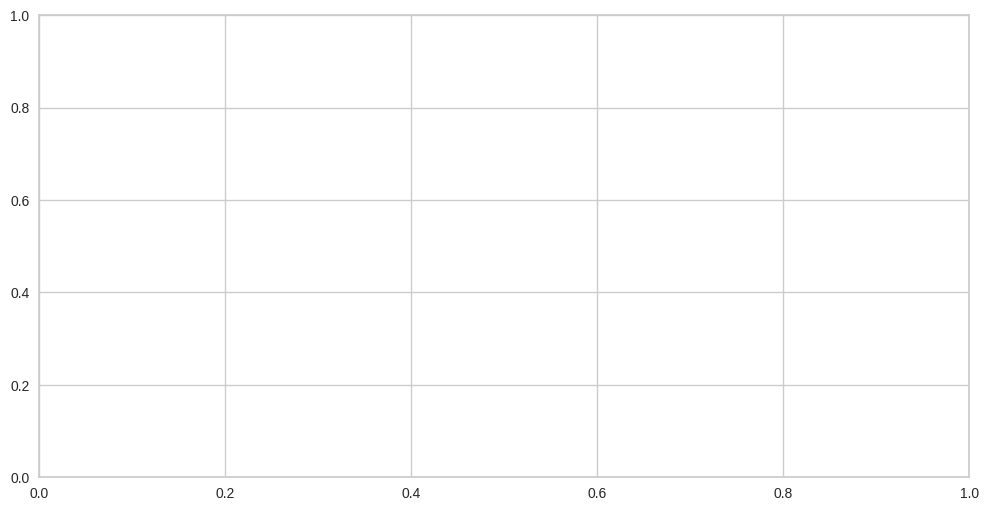

In [54]:
evaluate_model(tuned_qda)

In [55]:
!pip install statsmodels --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [56]:
clf_pca = setup(data=data, target='target', train_size=0.7, session_id=123, normalize = True, pca = True, pca_components = 3)

,Description,Value
0,Session id,123
1,Target,target
2,Target type,Binary
3,Original data shape,"(81, 7)"
4,Transformed data shape,"(81, 4)"
5,Transformed train set shape,"(56, 4)"
6,Transformed test set shape,"(25, 4)"
7,Numeric features,6
8,Preprocess,True
9,Imputation type,simple


In [57]:
best_model_pca = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ridge,Ridge Classifier,0.7867,0.0000,0.7667,0.7417,0.7457,0.5731,0.5874,0.1360
lda,Linear Discriminant Analysis,0.7700,0.8444,0.7333,0.7250,0.7190,0.5397,0.5540,0.1680
qda,Quadratic Discriminant Analysis,0.7667,0.8611,0.7333,0.7250,0.7124,0.5346,0.5581,0.0910
et,Extra Trees Classifier,0.7533,0.8833,0.7333,0.8700,0.7367,0.5183,0.5945,0.4180
lr,Logistic Regression,0.7500,0.8444,0.7667,0.7000,0.7219,0.4867,0.5006,0.1690
knn,K Neighbors Classifier,0.7333,0.8556,0.7667,0.7500,0.7348,0.4615,0.4861,0.2040
rf,Random Forest Classifier,0.7333,0.9000,0.7667,0.7933,0.7198,0.4799,0.5497,0.4360
nb,Naive Bayes,0.7033,0.7333,0.6667,0.6417,0.6457,0.4064,0.4167,0.1610
dt,Decision Tree Classifier,0.7000,0.7000,0.7000,0.5583,0.6171,0.3943,0.4193,0.1340
ada,Ada Boost Classifier,0.7000,0.7500,0.7000,0.6850,0.6545,0.4013,0.4475,0.2680


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [58]:
best_model_pca

RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, positive=False, random_state=123, solver='auto',
                tol=0.0001)

In [59]:
tuned_best_model_pca = tune_model(best_model_pca)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,0.6667,0.0000,0.6667,0.6667,0.6667,0.3333,0.3333
2,0.6667,0.0000,0.6667,0.6667,0.6667,0.3333,0.3333
3,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
5,0.8333,0.0000,1.0000,0.7500,0.8571,0.6667,0.7071
6,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,0.8000,0.0000,1.0000,0.6667,0.8000,0.6154,0.6667
8,0.6000,0.0000,0.6667,0.6667,0.6667,0.1667,0.1667


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

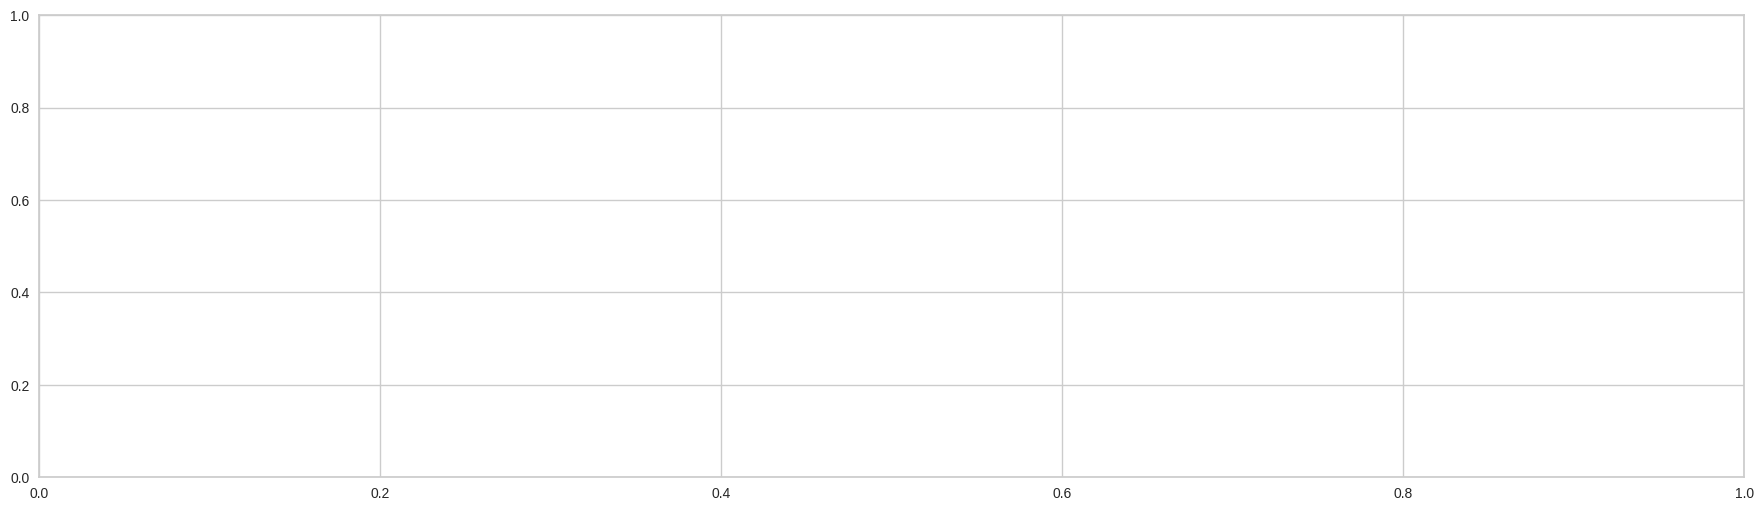

In [60]:
evaluate_model(tuned_best_model_pca)

In [61]:
lr_pca = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,0.6667,0.6667,0.6667,0.6667,0.6667,0.3333,0.3333
2,0.6667,0.8889,0.6667,0.6667,0.6667,0.3333,0.3333
3,0.8333,1.0000,1.0000,0.7500,0.8571,0.6667,0.7071
4,0.5000,0.5556,0.0000,0.0000,0.0000,0.0000,0.0000
5,0.8333,1.0000,1.0000,0.7500,0.8571,0.6667,0.7071
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,0.8000,1.0000,1.0000,0.6667,0.8000,0.6154,0.6667
8,0.4000,0.6667,0.6667,0.5000,0.5714,-0.3636,-0.4082


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [62]:
tuned_lr_pca = tune_model(lr_pca)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,0.6667,0.6667,0.6667,0.6667,0.6667,0.3333,0.3333
2,0.6667,0.8889,0.6667,0.6667,0.6667,0.3333,0.3333
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,0.5000,0.5556,0.0000,0.0000,0.0000,0.0000,0.0000
5,0.8333,1.0000,1.0000,0.7500,0.8571,0.6667,0.7071
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,0.8000,1.0000,1.0000,0.6667,0.8000,0.6154,0.6667
8,0.6000,0.6667,0.6667,0.6667,0.6667,0.1667,0.1667


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [63]:
tuned_lr_pca

LogisticRegression(C=2.833, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

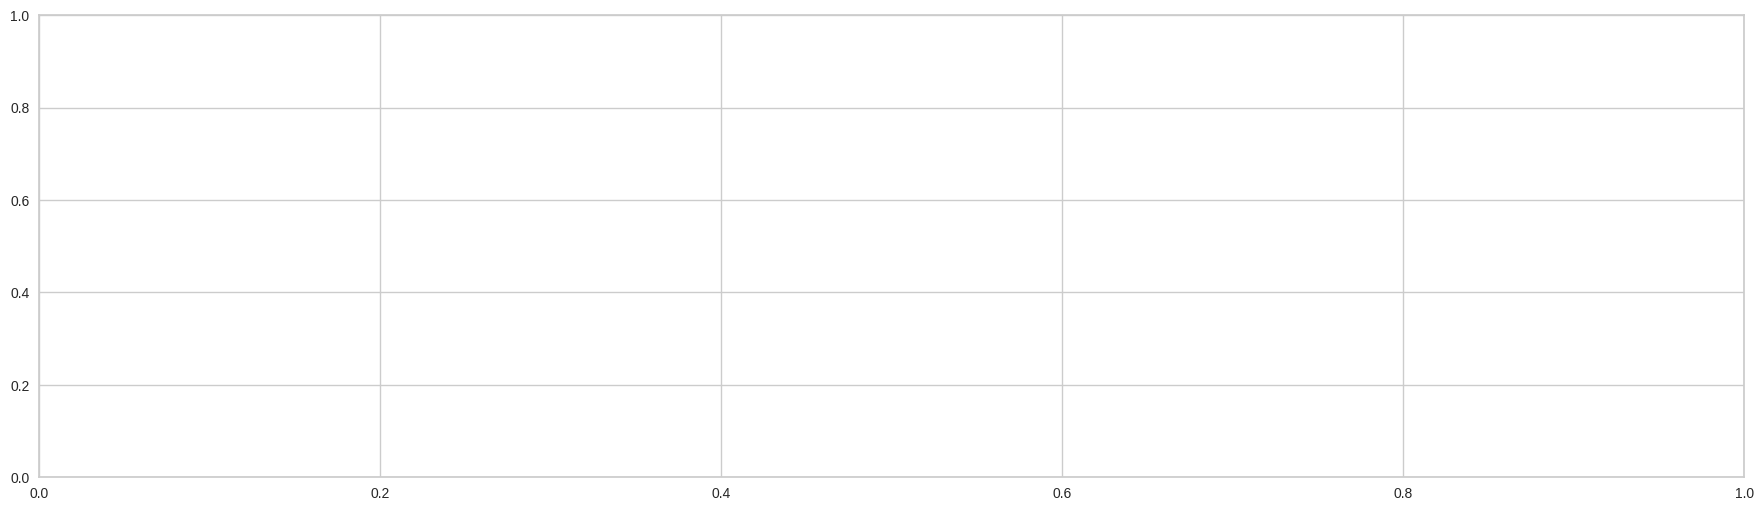

In [64]:
evaluate_model(tuned_lr_pca)

In [65]:
knn_pca = create_model('knn')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8333,0.9444,1.0000,0.7500,0.8571,0.6667,0.7071
1,0.3333,0.4444,0.3333,0.3333,0.3333,-0.3333,-0.3333
2,0.6667,0.7778,0.6667,0.6667,0.6667,0.3333,0.3333
3,0.8333,0.9444,1.0000,0.7500,0.8571,0.6667,0.7071
4,0.6667,0.9444,0.3333,1.0000,0.5000,0.3333,0.4472
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,0.8000,1.0000,1.0000,0.6667,0.8000,0.6154,0.6667
8,0.6000,0.7500,0.6667,0.6667,0.6667,0.1667,0.1667


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [66]:
tuned_knn_pca = tune_model(knn_pca)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8333,0.9444,0.6667,1.0000,0.8000,0.6667,0.7071
1,0.5000,0.5556,0.0000,0.0000,0.0000,0.0000,0.0000
2,0.8333,0.8333,0.6667,1.0000,0.8000,0.6667,0.7071
3,0.6667,0.8333,0.6667,0.6667,0.6667,0.3333,0.3333
4,0.6667,0.7778,0.3333,1.0000,0.5000,0.3333,0.4472
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,0.8000,0.8333,0.6667,1.0000,0.8000,0.6154,0.6667


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [67]:
tuned_knn_pca

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=-1, n_neighbors=4, p=2,
                     weights='uniform')

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

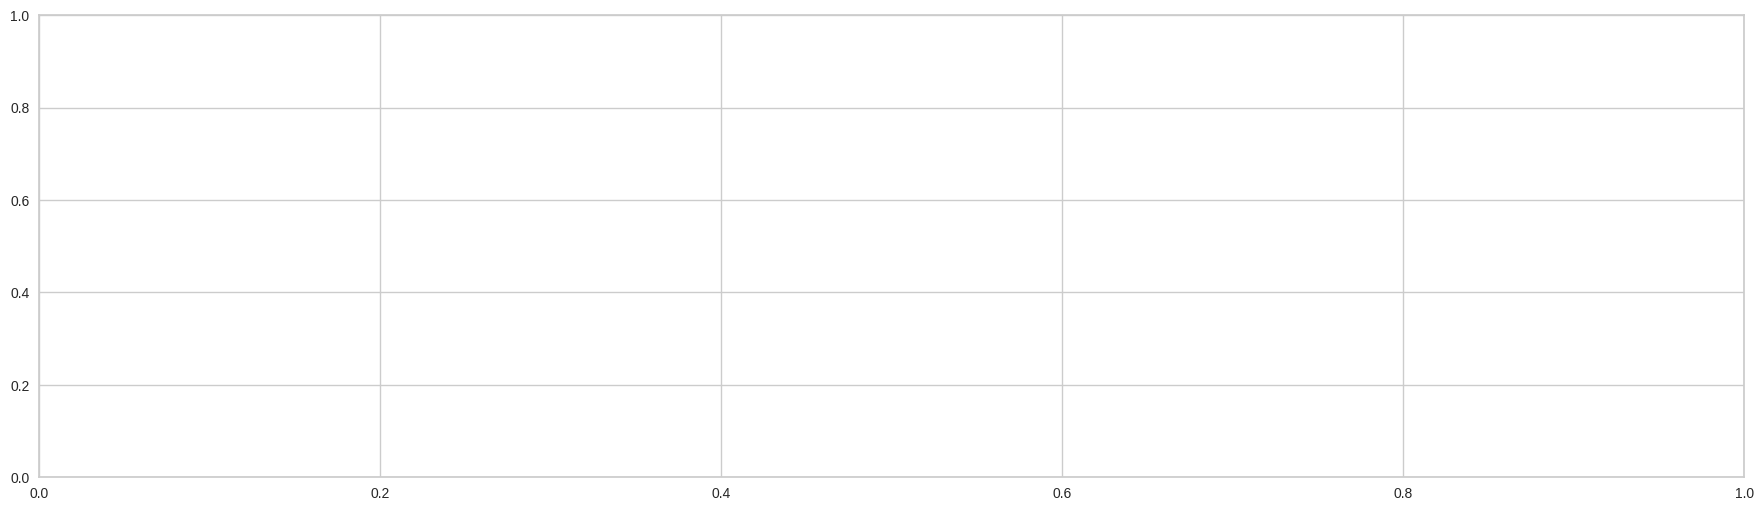

In [68]:
evaluate_model(tuned_knn_pca)

In [69]:
qda_pca = create_model('qda')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,0.5000,0.4444,0.3333,0.5000,0.4000,0.0000,0.0000
2,0.8333,1.0000,0.6667,1.0000,0.8000,0.6667,0.7071
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,0.5000,0.6667,0.0000,0.0000,0.0000,0.0000,0.0000
5,0.8333,1.0000,1.0000,0.7500,0.8571,0.6667,0.7071
6,0.8000,1.0000,1.0000,0.6667,0.8000,0.6154,0.6667
7,0.8000,1.0000,1.0000,0.6667,0.8000,0.6154,0.6667
8,0.6000,0.6667,0.6667,0.6667,0.6667,0.1667,0.1667


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [70]:
tuned_qda_pca = tune_model(qda_pca)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,0.5000,0.4444,0.3333,0.5000,0.4000,0.0000,0.0000
2,0.8333,0.8889,0.6667,1.0000,0.8000,0.6667,0.7071
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,0.5000,0.6667,0.0000,0.0000,0.0000,0.0000,0.0000
5,0.8333,1.0000,1.0000,0.7500,0.8571,0.6667,0.7071
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,0.8000,1.0000,1.0000,0.6667,0.8000,0.6154,0.6667
8,0.6000,0.6667,0.6667,0.6667,0.6667,0.1667,0.1667


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [71]:
tuned_qda_pca

QuadraticDiscriminantAnalysis(priors=None, reg_param=0.17,
                              store_covariance=False, tol=0.0001)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

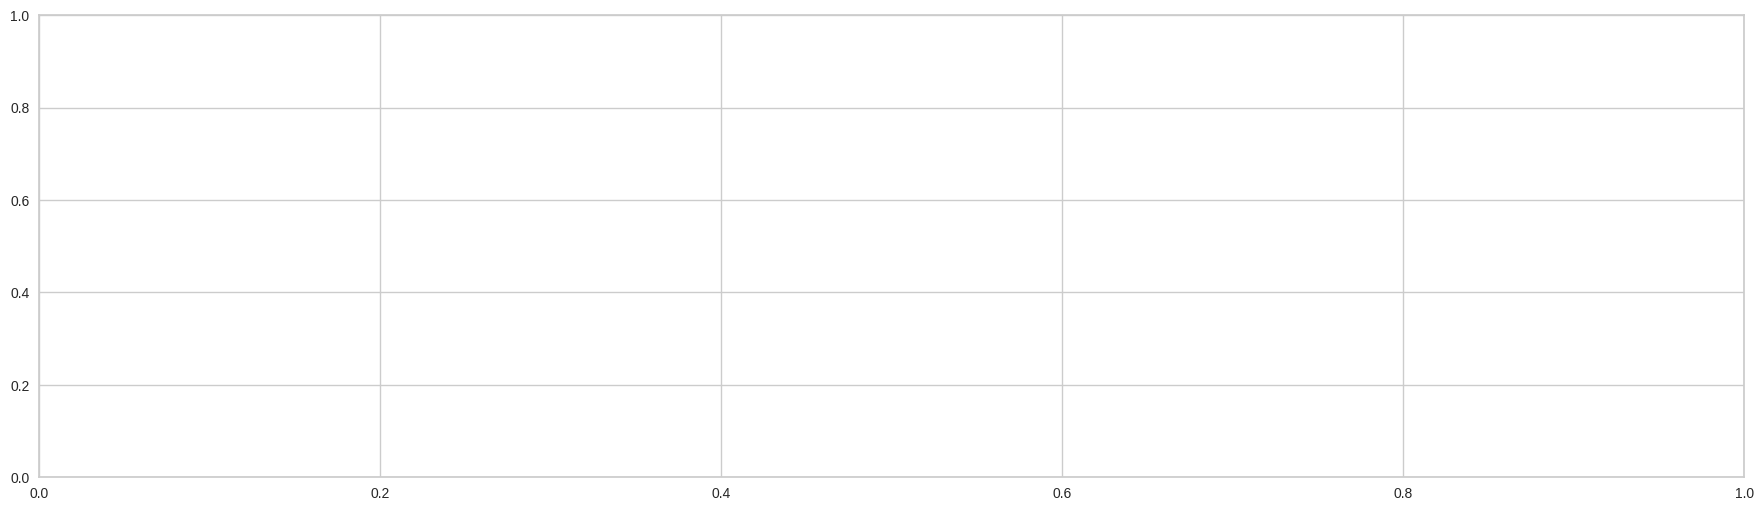

In [72]:
evaluate_model(tuned_qda_pca)

In [73]:
et_pca = create_model('et')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8333,0.8889,0.6667,1.0000,0.8000,0.6667,0.7071
1,0.6667,0.6667,0.3333,1.0000,0.5000,0.3333,0.4472
2,0.8333,1.0000,0.6667,1.0000,0.8000,0.6667,0.7071
3,0.6667,1.0000,1.0000,0.6000,0.7500,0.3333,0.4472
4,0.6667,0.8889,0.3333,1.0000,0.5000,0.3333,0.4472
5,0.6667,0.8889,1.0000,0.6000,0.7500,0.3333,0.4472
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,0.6000,1.0000,1.0000,0.5000,0.6667,0.2857,0.4082
8,0.8000,0.8333,0.6667,1.0000,0.8000,0.6154,0.6667


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [74]:
tuned_et_pca = tune_model(et_pca)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,0.5000,0.6667,0.3333,0.5000,0.4000,0.0000,0.0000
2,0.8333,0.8889,0.6667,1.0000,0.8000,0.6667,0.7071
3,0.6667,0.8889,0.6667,0.6667,0.6667,0.3333,0.3333
4,0.5000,0.7778,0.0000,0.0000,0.0000,0.0000,0.0000
5,0.8333,1.0000,1.0000,0.7500,0.8571,0.6667,0.7071
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,0.8000,1.0000,1.0000,0.6667,0.8000,0.6154,0.6667
8,0.6000,0.6667,0.6667,0.6667,0.6667,0.1667,0.1667


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [75]:
tuned_et_pca

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     n_estimators=100, n_jobs=-1, oob_score=False,
                     random_state=123, verbose=0, warm_start=False)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

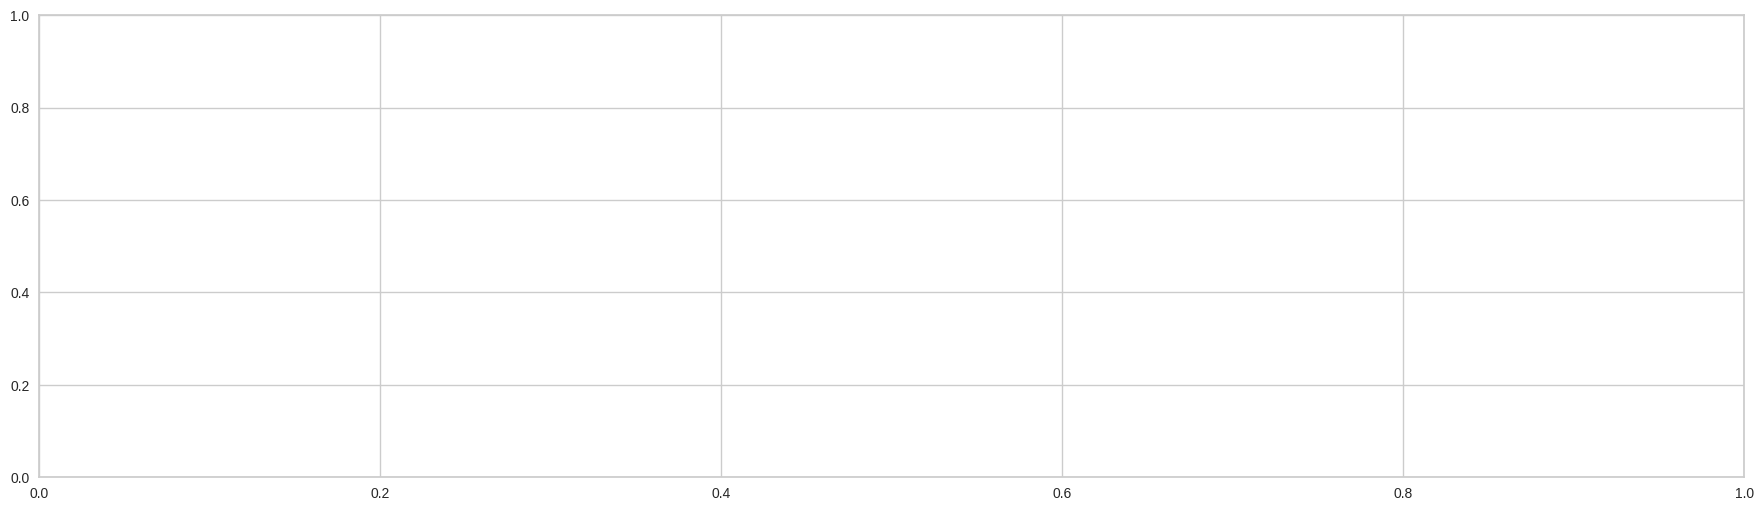

In [76]:
evaluate_model(tuned_et_pca)

In [77]:
 !pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.6/572.6 kB 9.5 MB/s eta 0:00:00


In [78]:
import shap